# Temat testów
### Czy istnieje istotna statystycznie różnica w czasie odpowiedzi w zależności od odpowiedzi na pytania dotyczące preferowanego typu grafiki i formy graficznej, a także zmiany zdania w tych pytaniach przed i po badaniu?

In [1]:
import pandas as pd

from functions.set_preparations import prepare_set_changes_questions, prepare_row, prepare_row_from_cols
from functions.tests.independent_groups.two_groups import ttest_or_mannwhitney_test
from functions.tests.independent_groups.more_than_two_groups import anova_or_kruskalwallis_test
from functions.plots import plot_multi_boxplot, plot_multi_density

In [2]:
df_answers = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', 'Quest1_before', 'Quest2_before']
)
df_answers = df_answers[df_answers.ID != 6] 

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv', usecols=['ID', 'Duration_1a', 'Duration_1b', 'Duration_2a', 'Duration_2b', 'Duration_3a', 'Duration_3b'])

df_quest = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/survey.csv',
    usecols=['ID', 'Quest1_after', 'Quest2_after']
)

df_merge = df_answers.merge(df_quest, on='ID')
df_merge = df_merge.merge(df_time, on='ID')
df_merge = df_merge[df_merge.ID != 6] 
df_merge.head()

ID Quest1_before Quest2_before Quest1_after Quest2_after  Duration_1a  \
0   1             B        wykres            B       wykres        28015   
1   2             B        wykres            B       wykres        66230   
2   3             B          mapa            B         mapa        68830   
3   4             B          mapa            B       wykres        46048   
4   5             B        tabela            B       tabela        67980   

   Duration_1b  Duration_2a  Duration_2b  Duration_3a  Duration_3b  
0        15516        54481        58697        56314        63897  
1        88463        42248        85329        47948       129427  
2        83963        45165        32732         8000        61197  
3        78446        12449        37715        60980       101795  
4        27582        55931        22132        34898        62930

In [3]:
# Utworzenie kolekcji:
# wszystkie grafiki
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(6)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(6)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(6)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(6)])
time_row = prepare_row(df_merge.filter(regex='Duration'))
df_collAll = pd.DataFrame({'time': time_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

# grafiki A
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(3)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(3)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(3)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(3)])
time_row = prepare_row(df_merge.filter(regex='^Duration_.*a'))
df_collA = pd.DataFrame({'time': time_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

# grafiki B
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(3)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(3)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(3)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(3)])
time_row = prepare_row(df_merge.filter(regex='^Duration_.*b'))
df_collB = pd.DataFrame({'time': time_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

# grafiki 1
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(2)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(2)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(2)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(2)])
time_row = prepare_row(df_merge.filter(regex='Duration_1'))
df_coll1 = pd.DataFrame({'time': time_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

# grafiki 2
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(2)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(2)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(2)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(2)])
time_row = prepare_row(df_merge.filter(regex='Duration_2'))
df_coll2 = pd.DataFrame({'time': time_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

# grafiki 3
q1_b = prepare_row_from_cols([df_merge['Quest1_before'] for _ in range(2)])
q2_b = prepare_row_from_cols([df_merge['Quest2_before'] for _ in range(2)])
q1_a = prepare_row_from_cols([df_merge['Quest1_after'] for _ in range(2)])
q2_a = prepare_row_from_cols([df_merge['Quest2_after'] for _ in range(2)])
time_row = prepare_row(df_merge.filter(regex='Duration_3'))
df_coll3 = pd.DataFrame({'time': time_row, 'quest1_before': q1_b, 'quest2_before': q2_b, 'quest1_after': q1_a, 'quest2_after': q2_a})

### TESTY

Testy oddzielnie dla każdej grafiki 1a, 1b, 2a, 2b, 3a, 3b

In [4]:
df1a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_1a']].rename(columns={'Duration_1a':'time'})
df2a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_2a']].rename(columns={'Duration_2a':'time'})
df3a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_3a']].rename(columns={'Duration_3a':'time'})

df1b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_1b']].rename(columns={'Duration_1b':'time'})
df2b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_2b']].rename(columns={'Duration_2b':'time'})
df3b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', 'Duration_3b']].rename(columns={'Duration_3b':'time'})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

**H0:** Nie ma istotnej statystycznie zależności między czasem odpowiedzi a wybraną preferowaną formą (mapa vs mapa + inne elementy; mapa vs tabela vs wykres vs tekst).

**H1:** Istnieje istotna statystycznie zależność między czasem odpowiedzi a wybraną preferowaną formą (mapa vs mapa + inne elementy; mapa vs tabela vs wykres vs tekst).

**Poziom istotności:** $\alpha=0.05$

In [6]:
ALPHA = 0.05

In [7]:
for nr, df in enumerate(dfs):
    print('---------------------------------------------')
    print(names[nr+1])
    for i in ['Quest1_before', 'Quest1_after']:
        print('----------------')
        print(i)
        ttest_or_mannwhitney_test(df, 'time', i, ALPHA, 'A', 'B')

---------------------------------------------
1a:
----------------
Quest1_before
Conducting normality test...
Conducting homogeneity variance test...
Mann-Whitney test conducted...
U-statistic: 62.0
p-value: 0.6795929532771638
Brak podstaw do odrzucenia H0.
----------------
Quest1_after
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 141.0
p-value: 0.5855986955142409
Brak podstaw do odrzucenia H0.
---------------------------------------------
1b:
----------------
Quest1_before
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 44.0
p-value: 0.22459787722945618
Brak podstaw do odrzucenia H0.
----------------
Quest1_after
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 173.0
p-value: 0.6937481238934825
Brak podstaw do odrzucenia H0.
---------------------------------------------
2a:
----------------
Quest1_before
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 29.0
p-value: 0.05311303206040048

In [8]:
col = 'time'
for nr, df in enumerate(dfs):
    print('---------------------------------------------')
    print(names[nr+1])
    for i in ['Quest2_before', 'Quest2_after']:
        print('----------------')
        print(i)
        anova_or_kruskalwallis_test(df, col, i, alpha=ALPHA)

---------------------------------------------
1a:
----------------
Quest2_before
Conducting normality test...
Conducting homogeneity variance test...
Kruskal-Wallis test conducted...
H: 2.775609756097566
p-value: 0.42753073954113074
Brak podstaw do odrzucenia H0.
----------------
Quest2_after
Data have not at least length 3...
Kruskal-Wallis test conducted...
H: 0.2657723577235771
p-value: 0.9663317587823116
Brak podstaw do odrzucenia H0.
---------------------------------------------
1b:
----------------
Quest2_before
Conducting normality test...
Kruskal-Wallis test conducted...
H: 3.775609756097566
p-value: 0.28673590011968875
Brak podstaw do odrzucenia H0.
----------------
Quest2_after
Data have not at least length 3...
Kruskal-Wallis test conducted...
H: 3.3645528455284506
p-value: 0.3387586728647392
Brak podstaw do odrzucenia H0.
---------------------------------------------
2a:
----------------
Quest2_before
Conducting normality test...
Kruskal-Wallis test conducted...
H: 1.367015

-------------------------------------
1a:


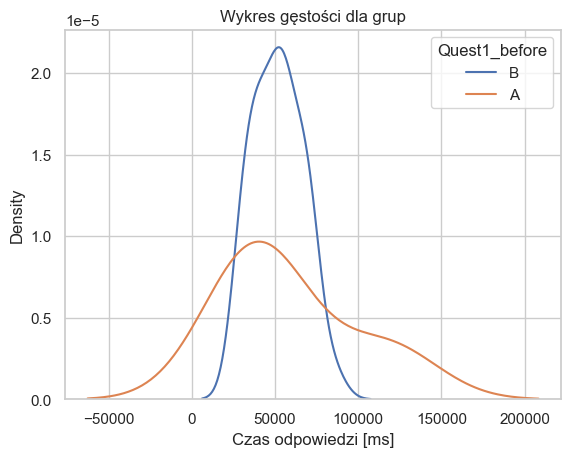

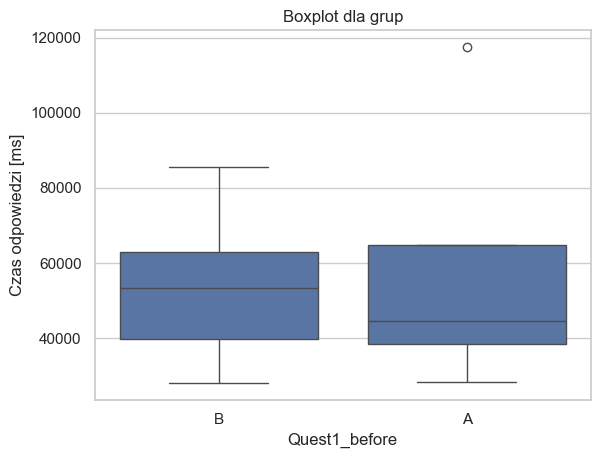

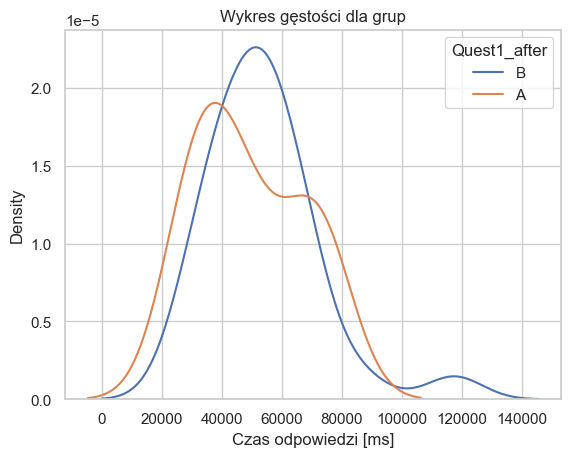

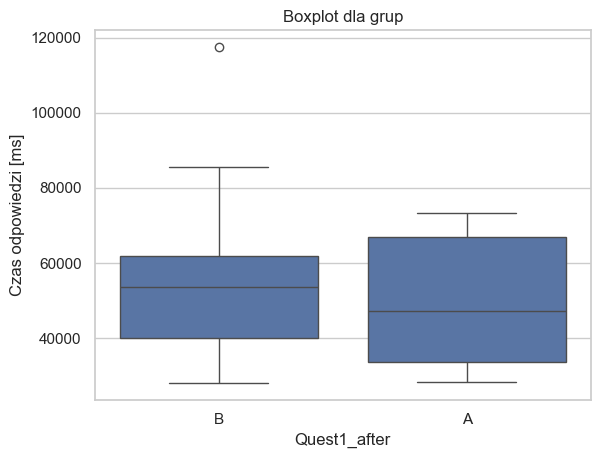

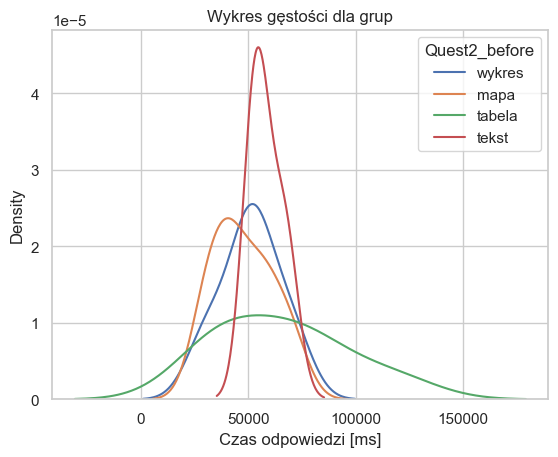

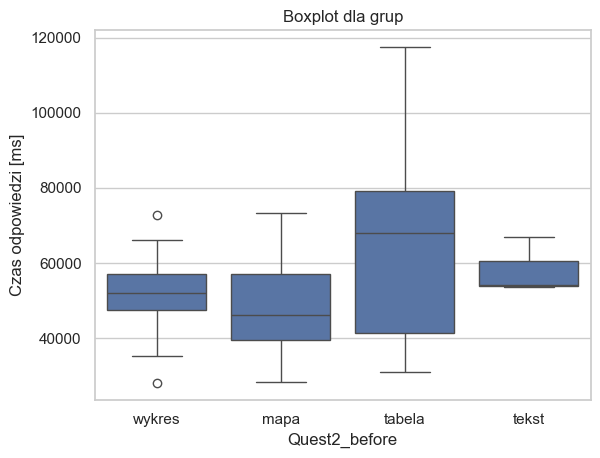

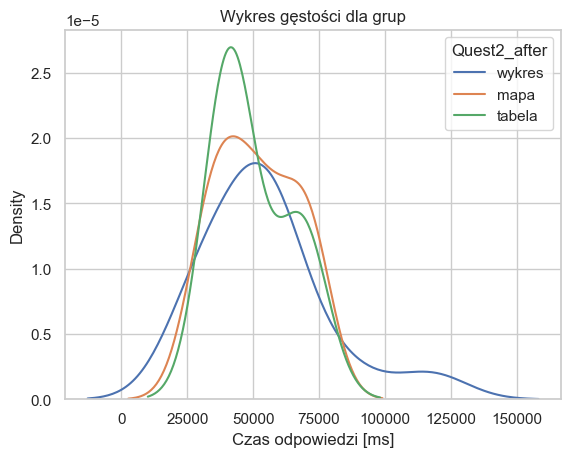

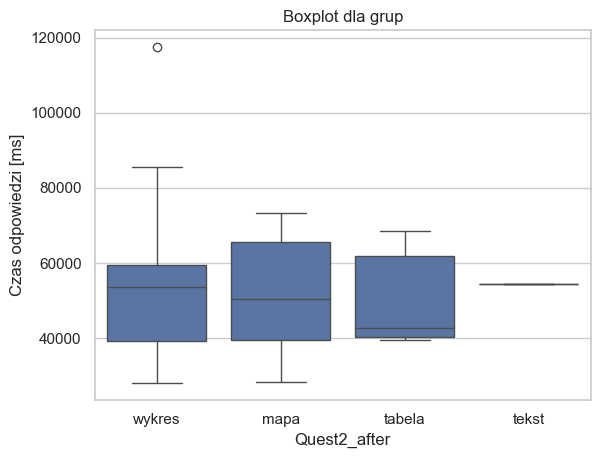

-------------------------------------
1b:


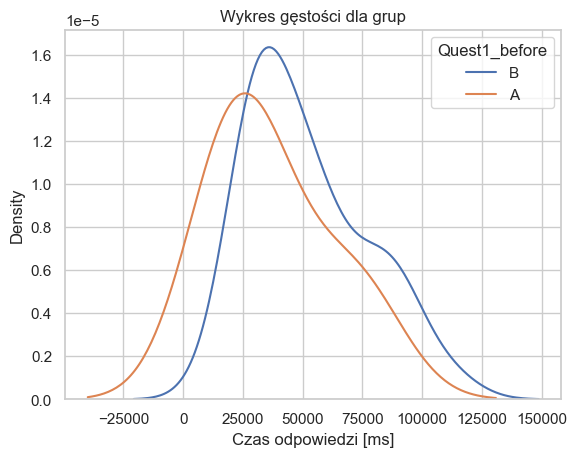

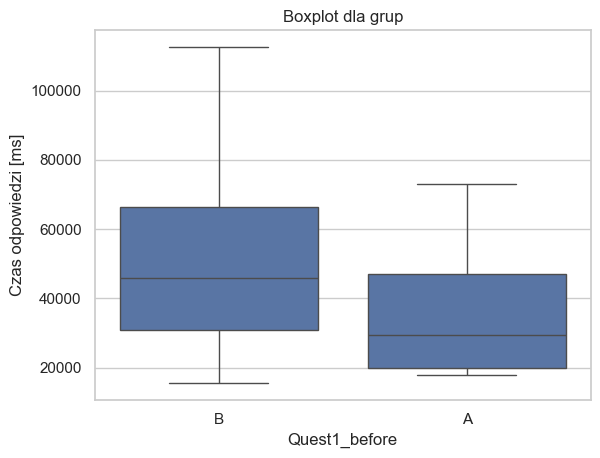

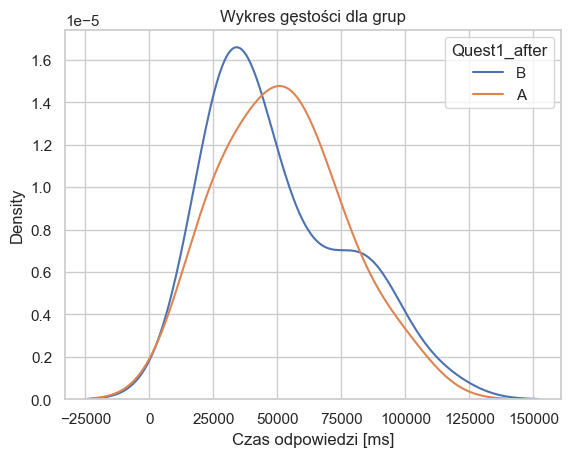

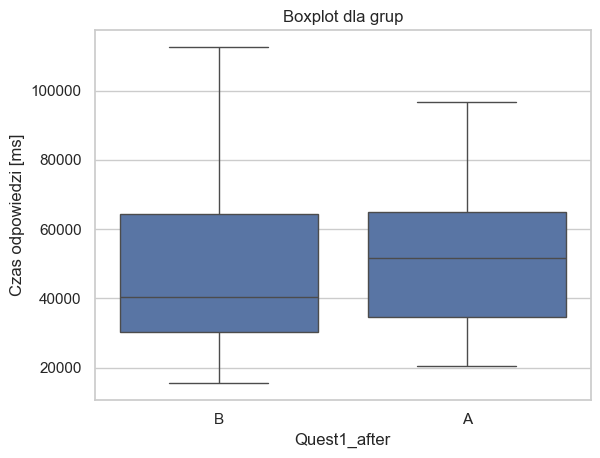

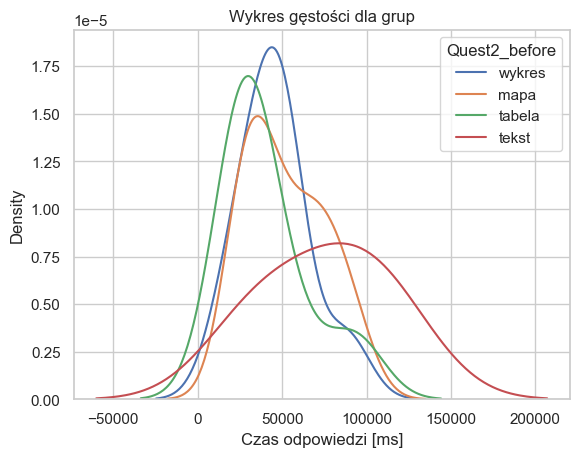

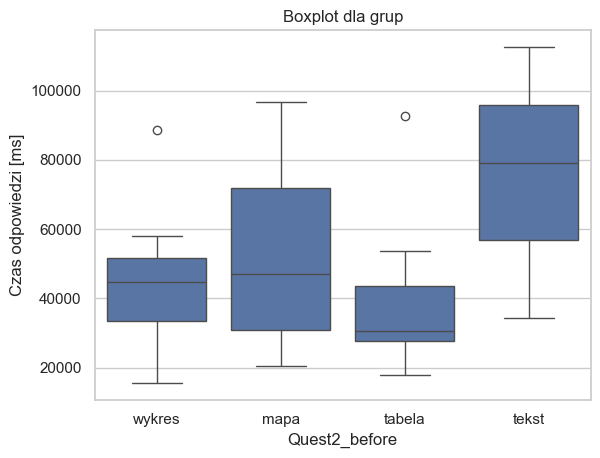

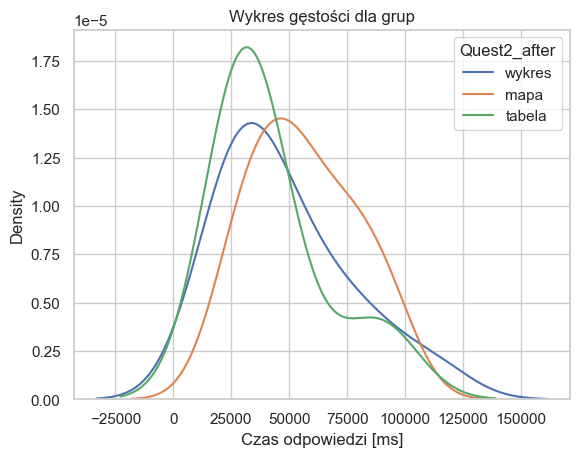

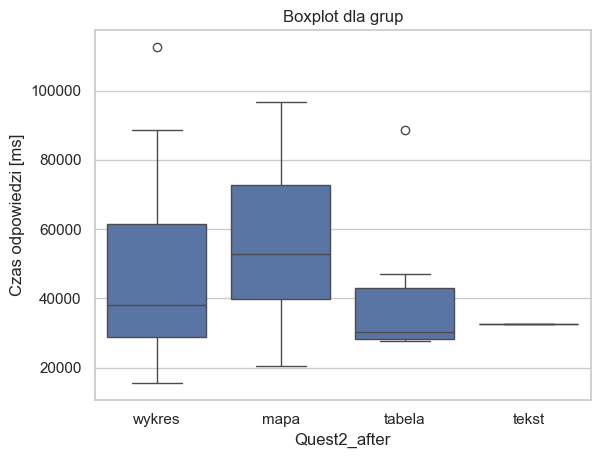

-------------------------------------
2a:


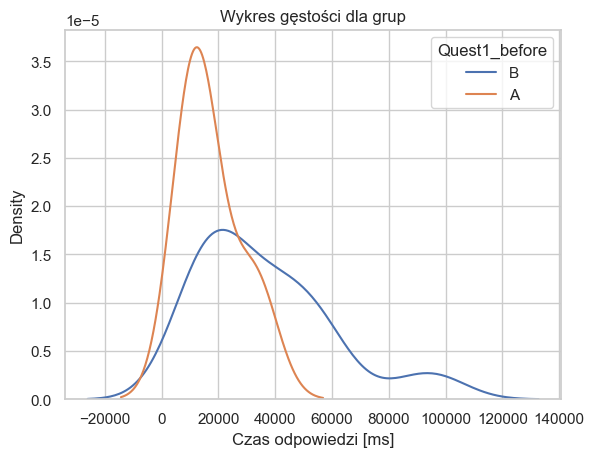

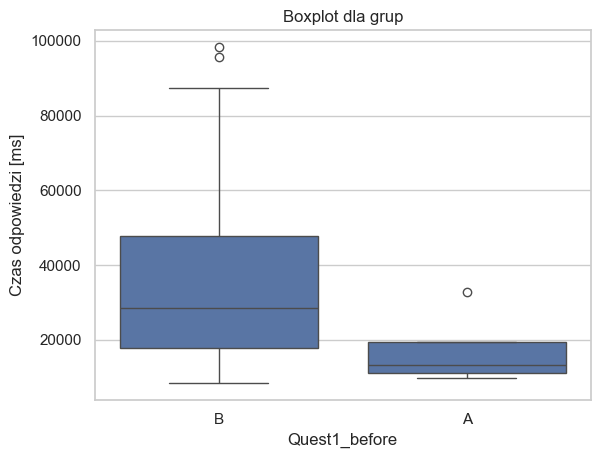

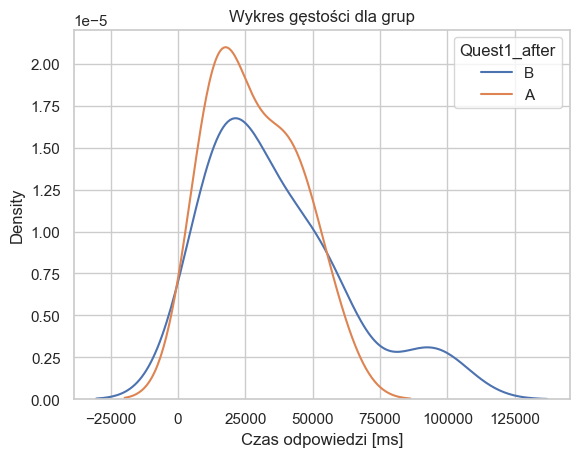

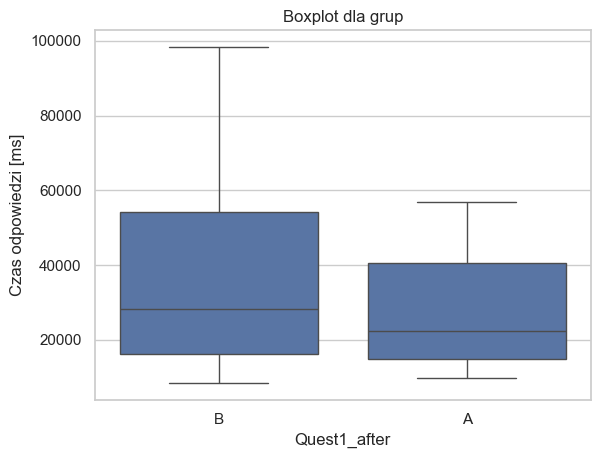

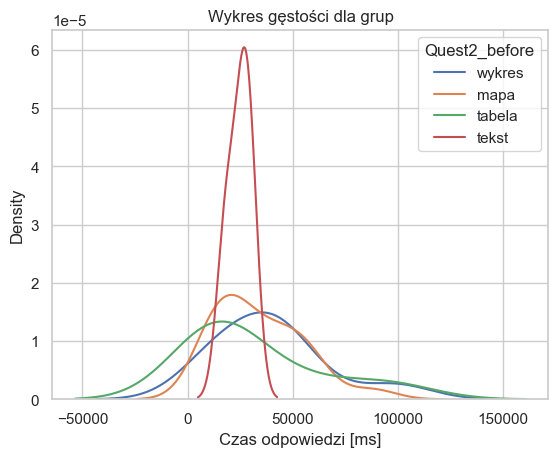

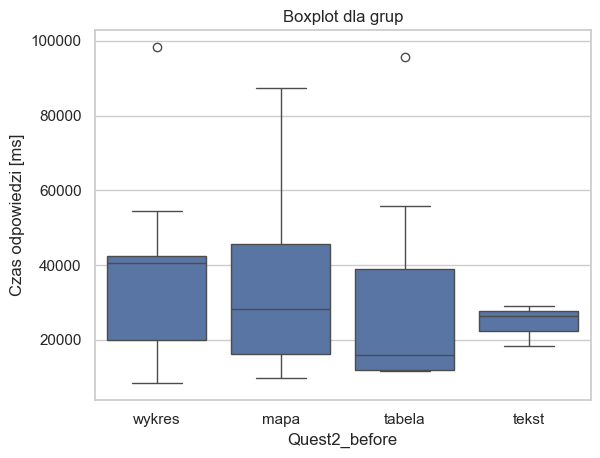

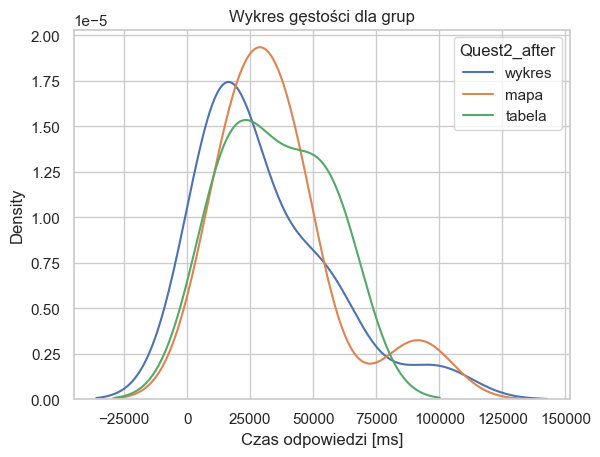

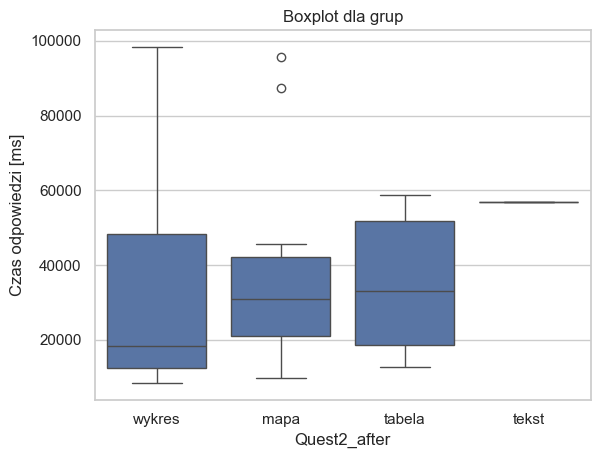

-------------------------------------
2b:


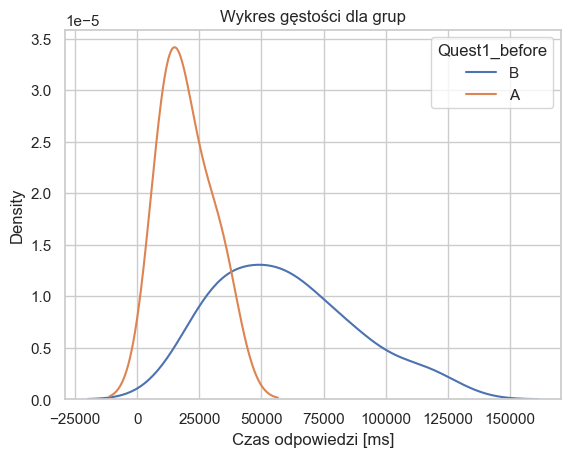

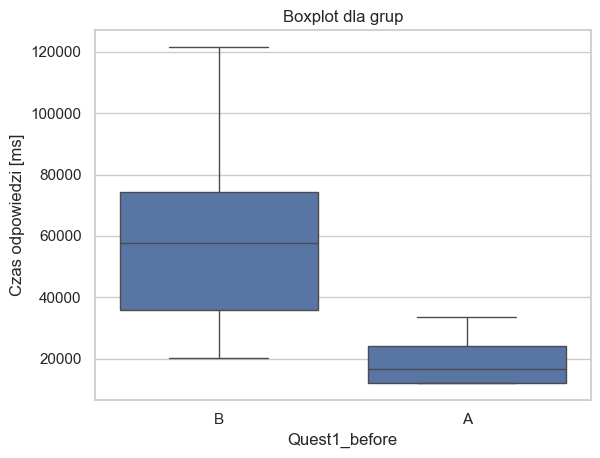

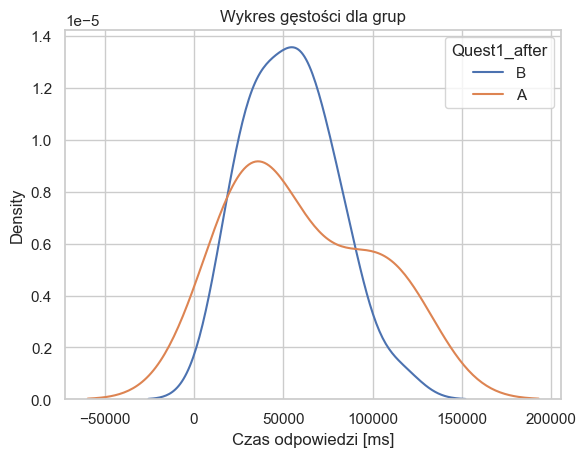

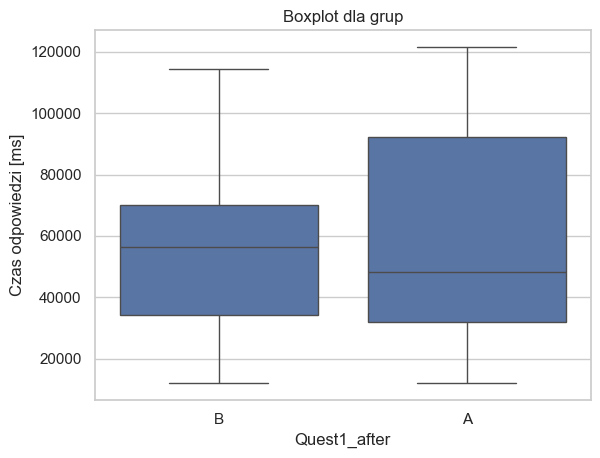

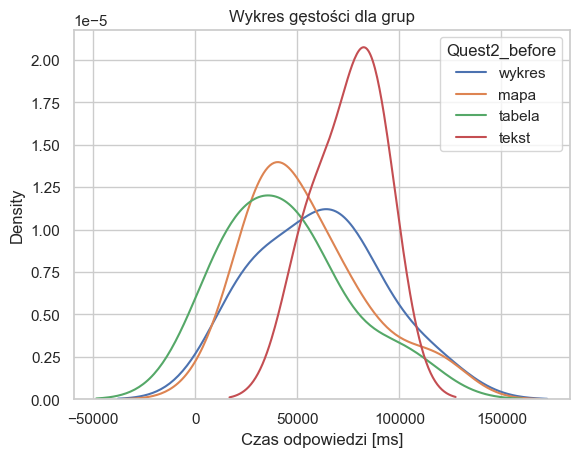

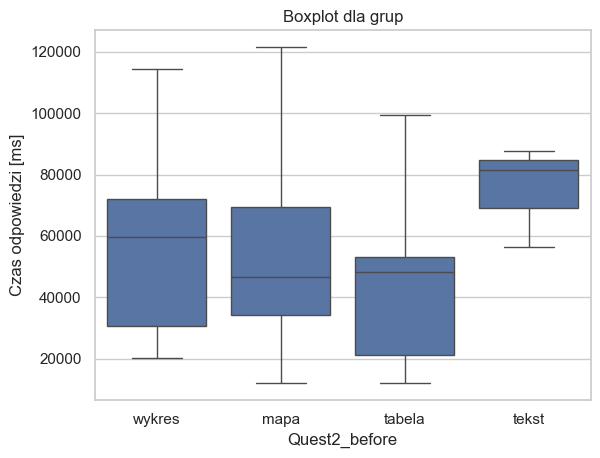

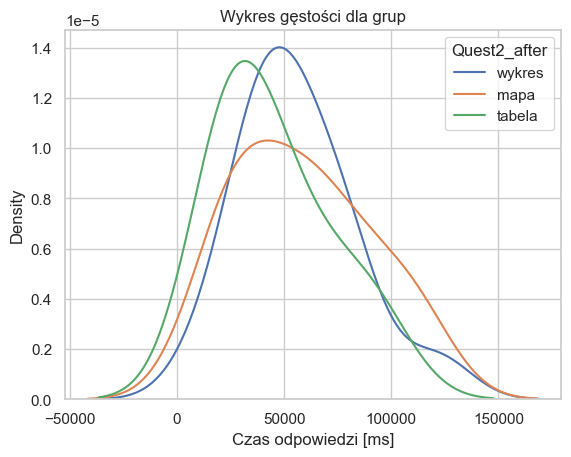

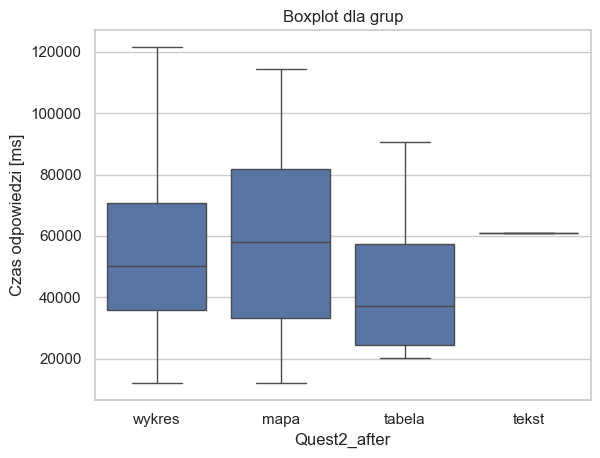

-------------------------------------
3a:


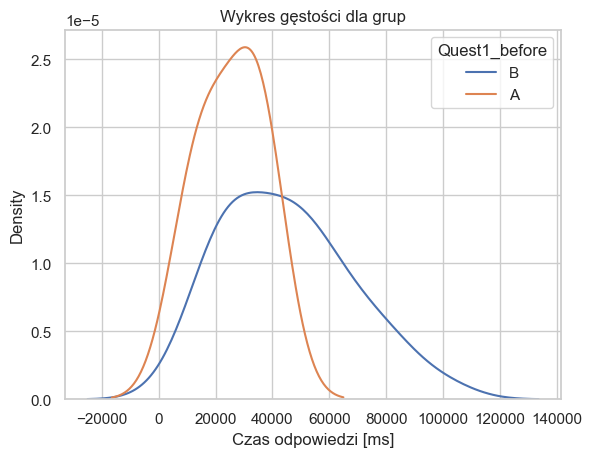

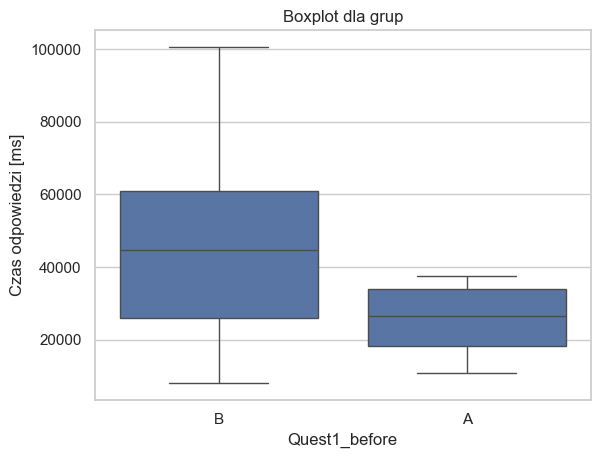

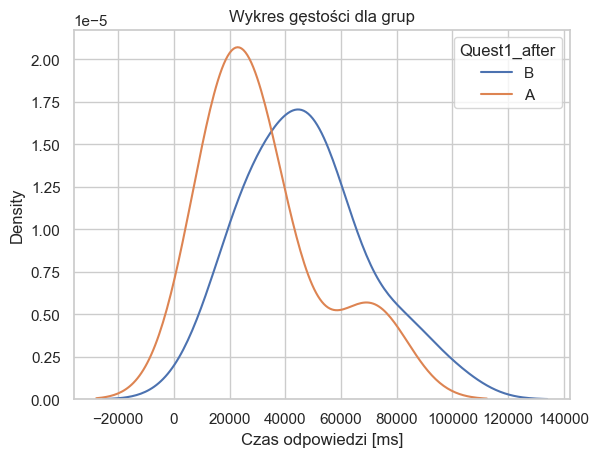

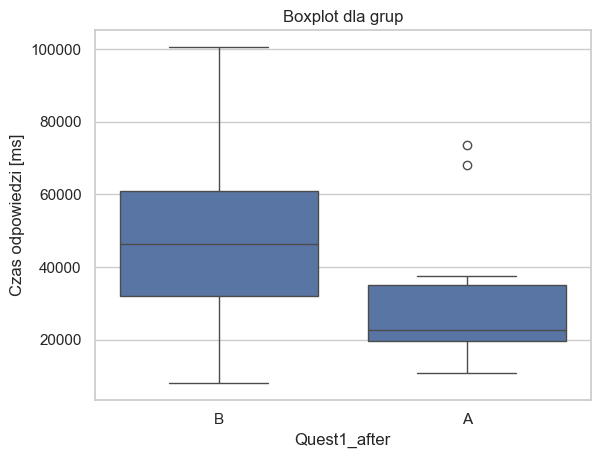

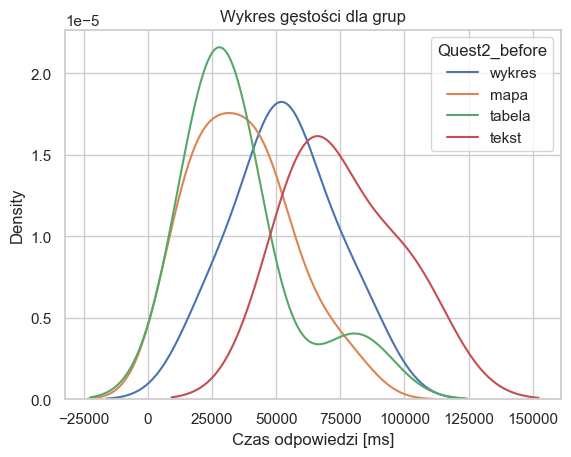

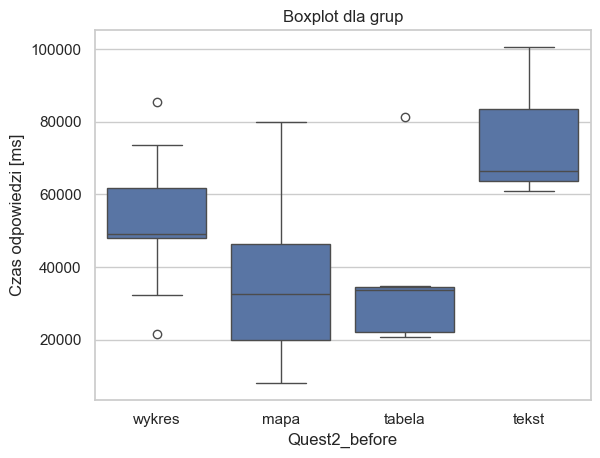

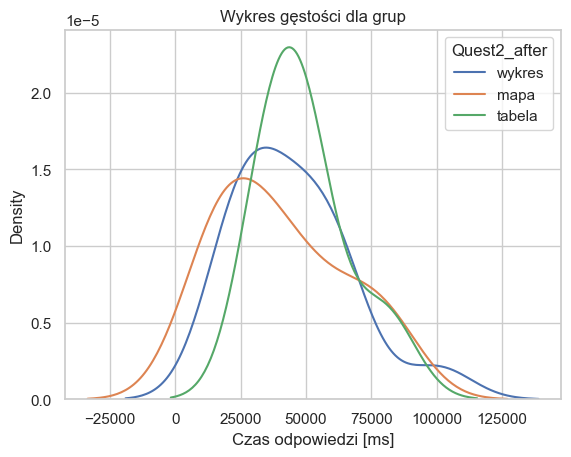

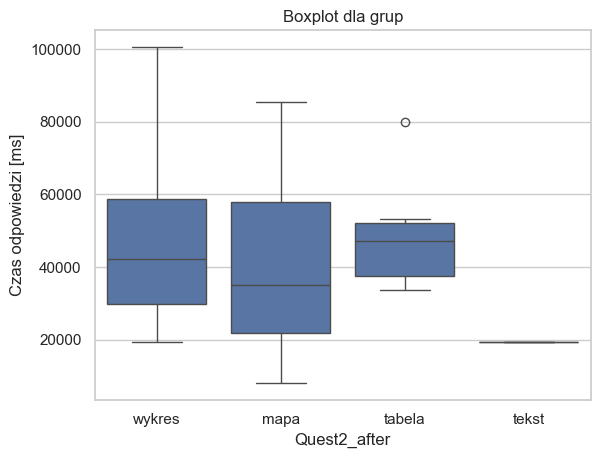

-------------------------------------
3b:


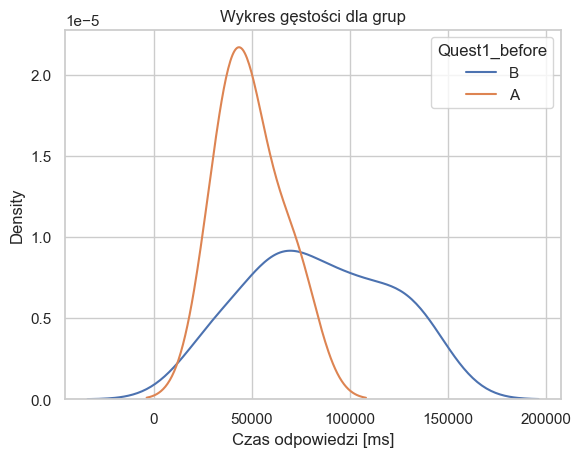

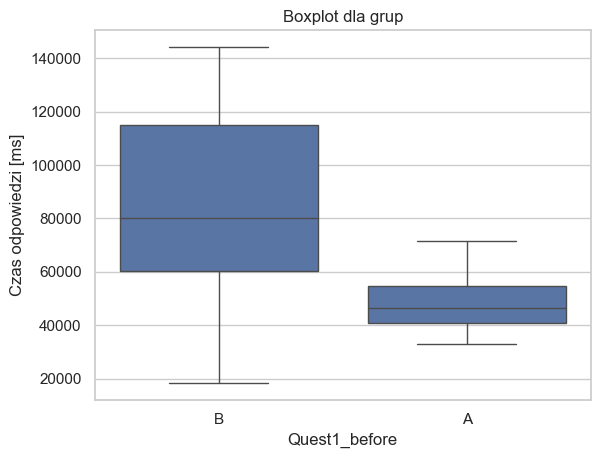

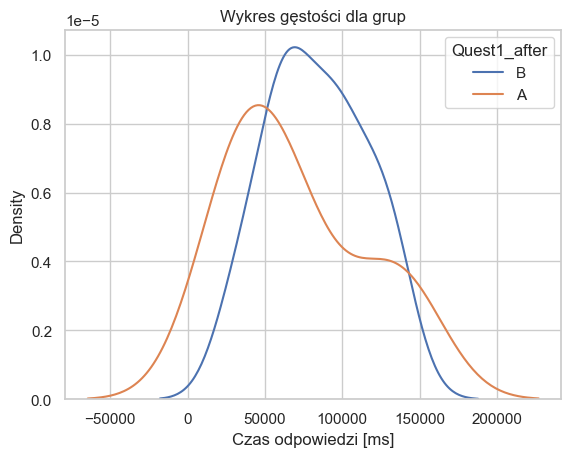

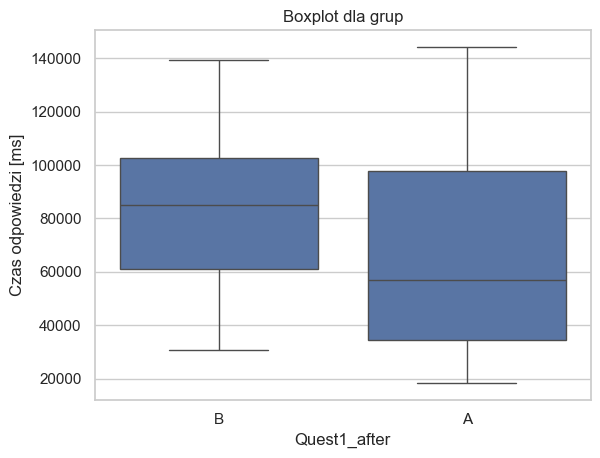

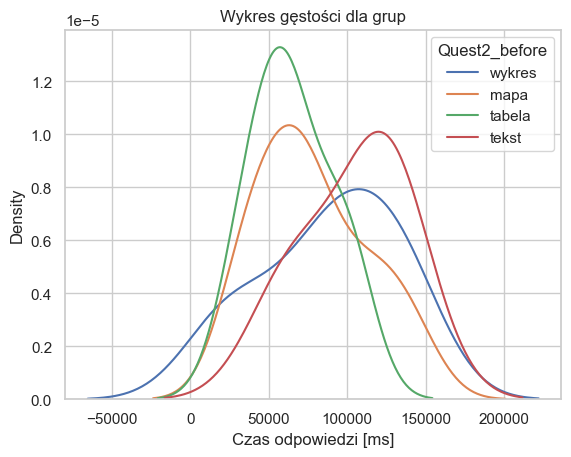

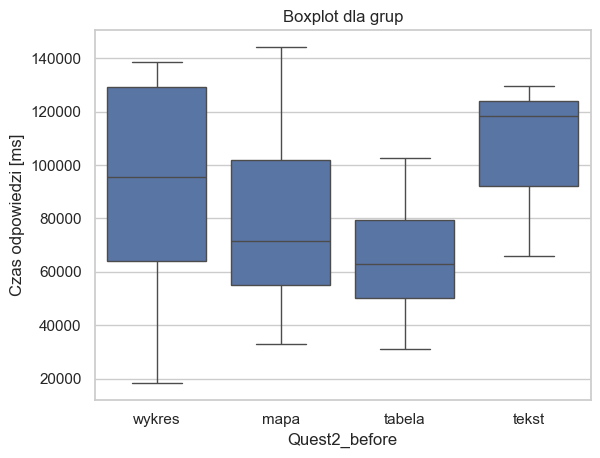

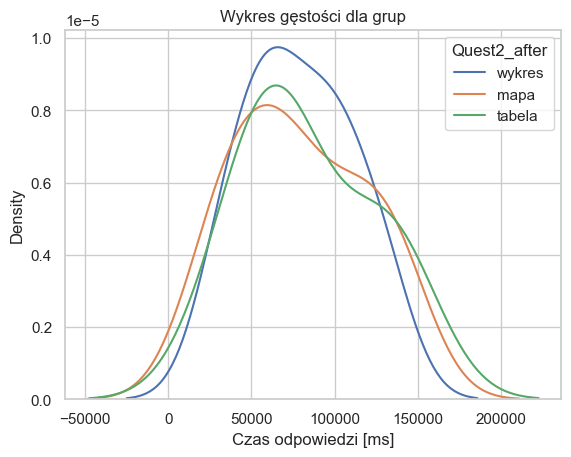

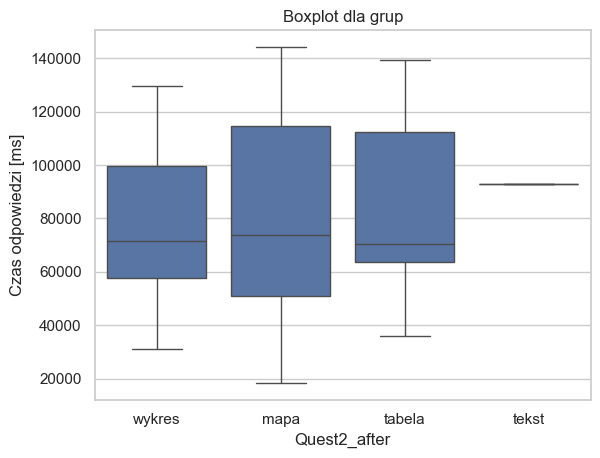

In [9]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    for quest in ['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after']:
        plot_multi_density(df, 'time', quest, 'Czas odpowiedzi [ms]', quest)
        plot_multi_boxplot(df, quest, 'time', quest, 'Czas odpowiedzi [ms]')

### Podsumowanie:
Istnieje istotna statystycznie zależność między czasem odpowiedzi a odpowiedzią na pytanie dotyczące preferowanej formy graficznej na poziomie istotności $\alpha=0.05$ dla:
- 2b (quest1_before)
- 3a (quest1_after, quest2_before)

### Analiza - osoby które zmieniły zdanie vs osoby które pozostały przy swojej opinii

**H0:** Nie ma istotnej statystycznie zależności między czasem odpowiedzi a zmianą zdania w pytaniu 1/2.

**H1:** Istnieje istotna statystycznie zależność między czasem odpowiedzi a zmianą zdania w pytaniu 1/2.

**Poziom istotności:** $\alpha=0.05$


In [10]:
df_merge['is_change_1'] = df_merge.apply(lambda row: row['Quest1_before'] != row['Quest1_after'], axis=1)
df_merge['is_change_2'] = df_merge.apply(lambda row: row['Quest2_before'] != row['Quest2_after'], axis=1)

#### Grafiki:

1a:
----------------
quest1
Conducting normality test...
Conducting homogeneity variance test...
Mann-Whitney test conducted...
U-statistic: 170.0
p-value: 0.3312157998407794
Brak podstaw do odrzucenia H0.


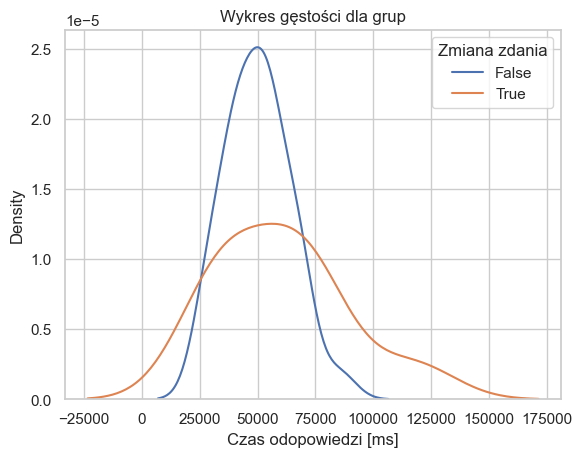

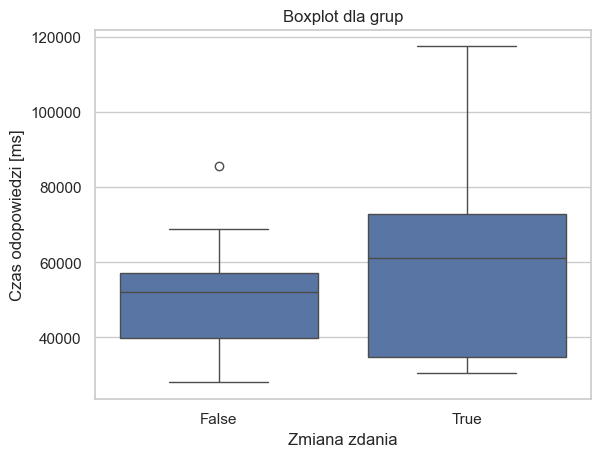

----------------
quest2
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 204.0
p-value: 0.7508713425135908
Brak podstaw do odrzucenia H0.


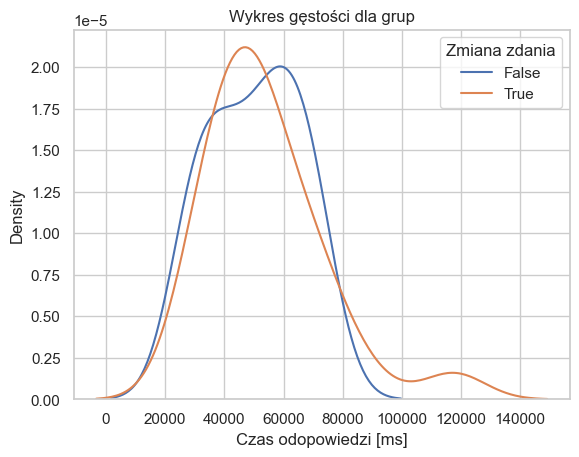

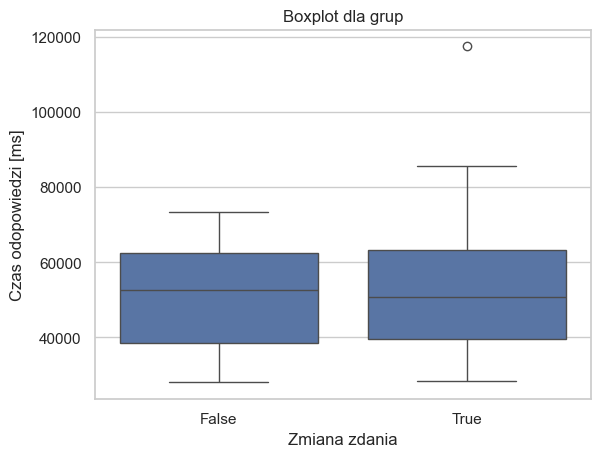

--------------------------------------------
1b:
----------------
quest1
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 144.0
p-value: 0.8969179400709345
Brak podstaw do odrzucenia H0.


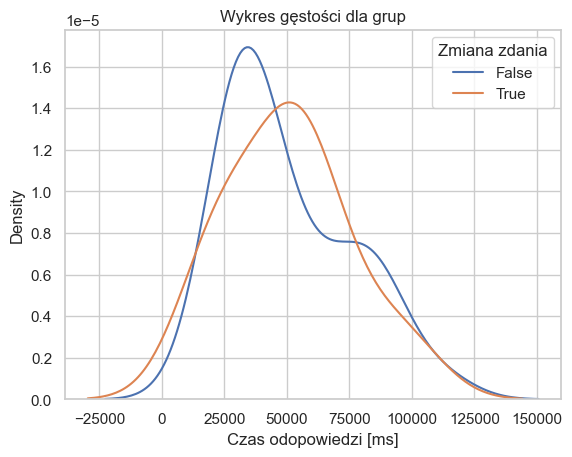

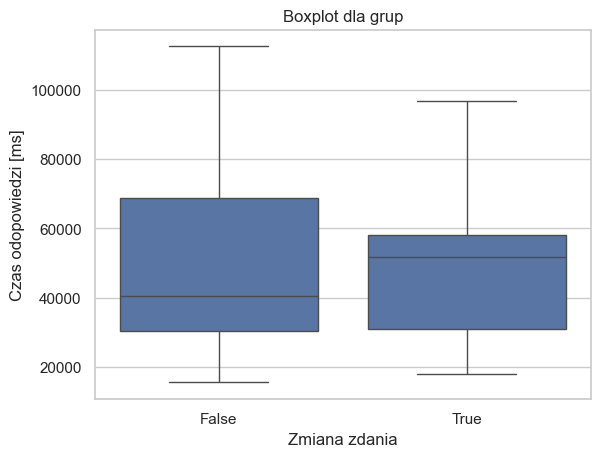

----------------
quest2
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 179.0
p-value: 0.7300203068185185
Brak podstaw do odrzucenia H0.


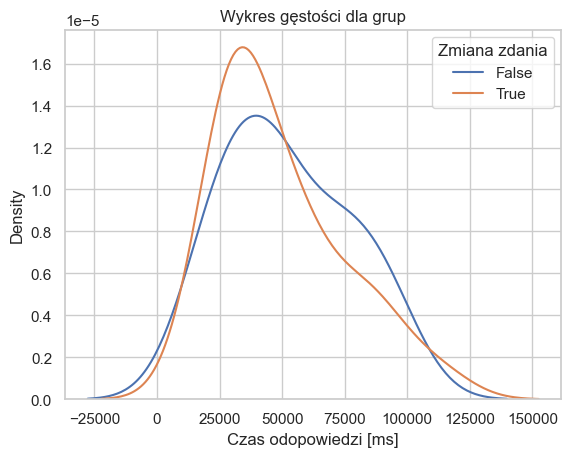

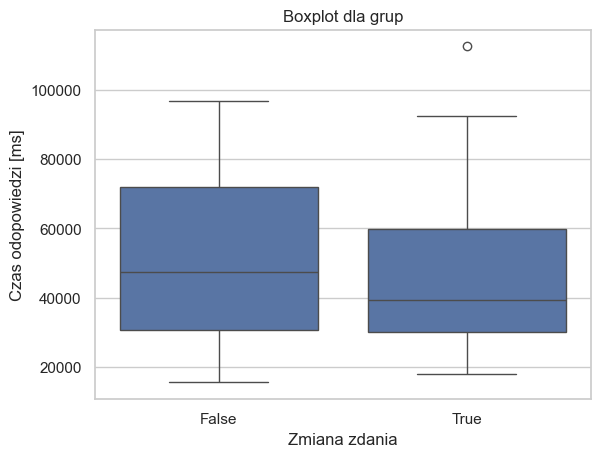

--------------------------------------------
2a:
----------------
quest1
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 124.0
p-value: 0.6270849076141936
Brak podstaw do odrzucenia H0.


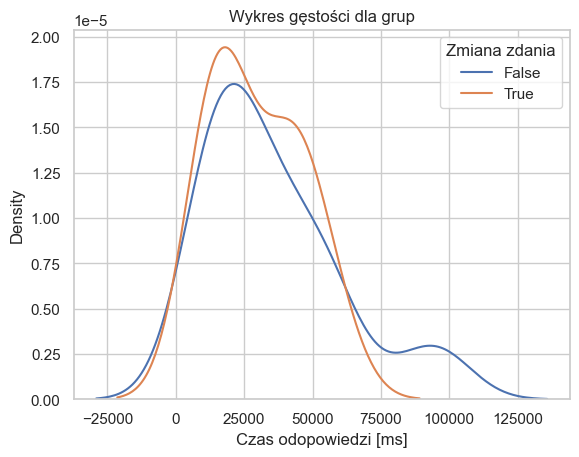

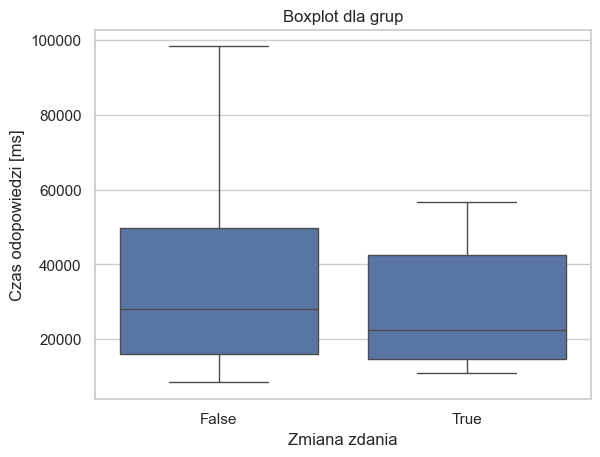

----------------
quest2
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 168.0
p-value: 0.5164772148074285
Brak podstaw do odrzucenia H0.


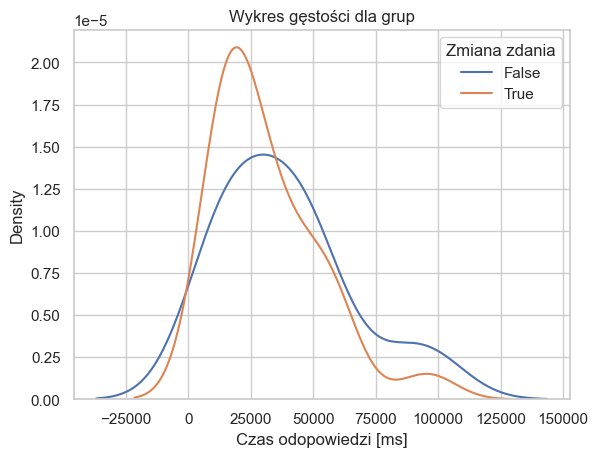

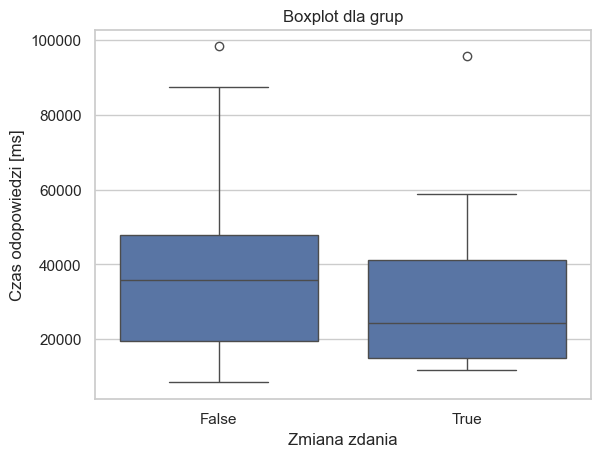

--------------------------------------------
2b:
----------------
quest1
Conducting normality test...
Conducting homogeneity variance test...
Mann-Whitney test conducted...
U-statistic: 169.0
p-value: 0.34758754174785444
Brak podstaw do odrzucenia H0.


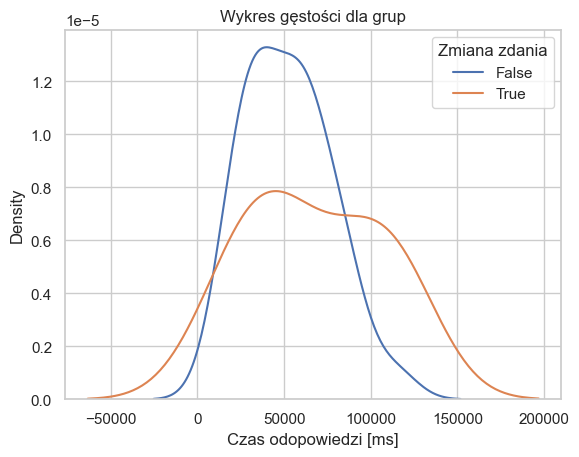

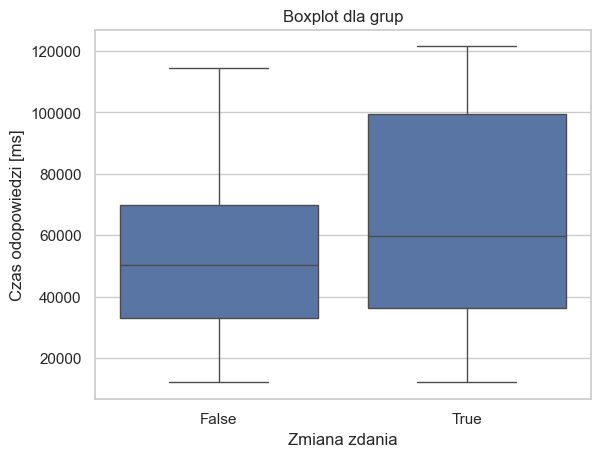

----------------
quest2
Conducting normality test...
Conducting homogeneity variance test...
T-Student test conducted...
T-statistic: 0.9634917004751397
p-value: 0.34139246259132616
Brak podstaw do odrzucenia H0.


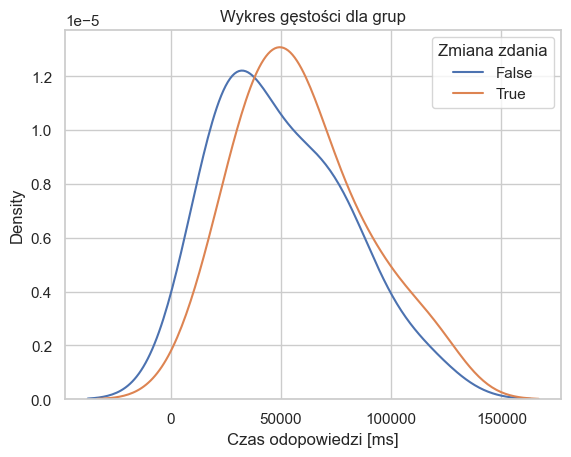

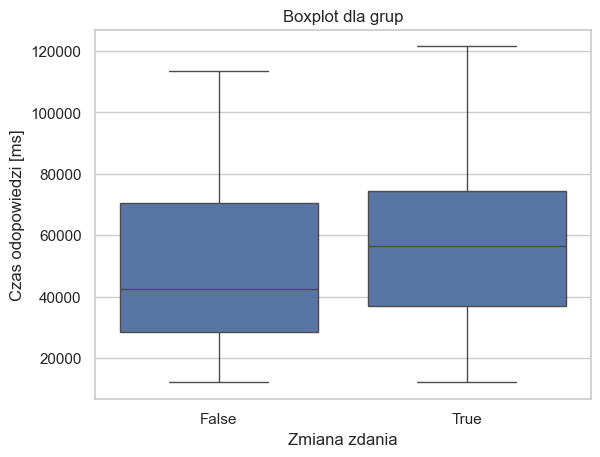

--------------------------------------------
3a:
----------------
quest1
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 83.0
p-value: 0.06971159555850104
Brak podstaw do odrzucenia H0.


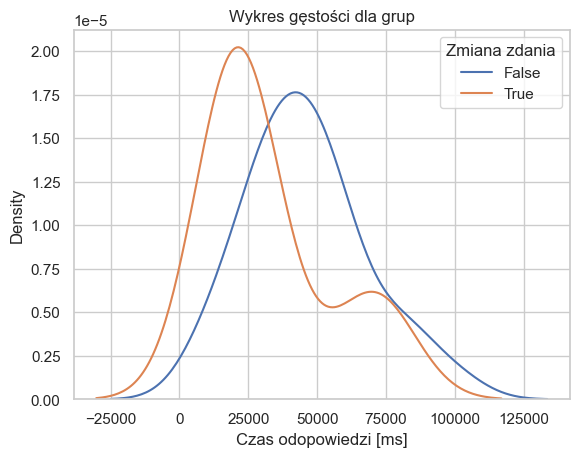

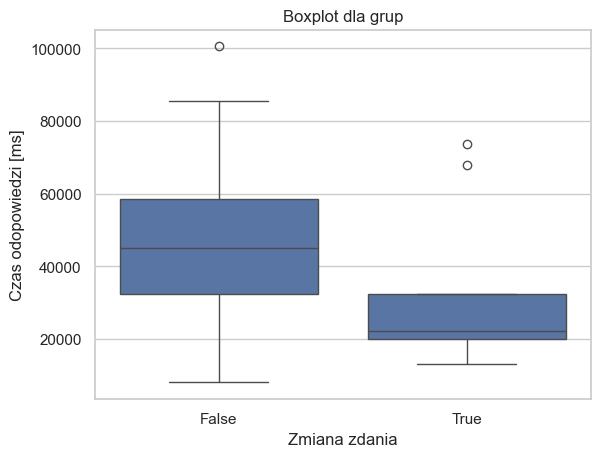

----------------
quest2
Conducting normality test...
Mann-Whitney test conducted...
U-statistic: 234.0
p-value: 0.2519080940857671
Brak podstaw do odrzucenia H0.


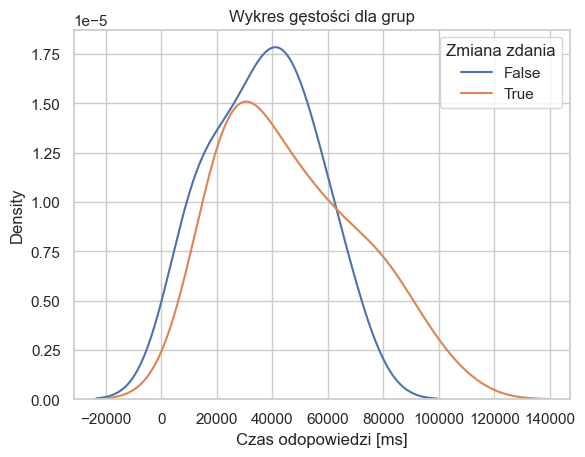

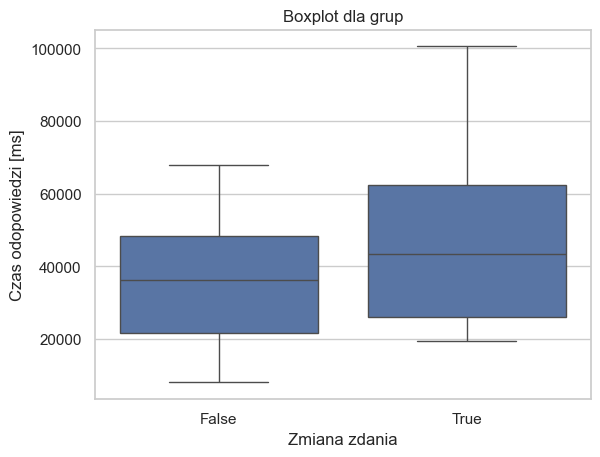

--------------------------------------------
3b:
----------------
quest1
Conducting normality test...
Conducting homogeneity variance test...
Mann-Whitney test conducted...
U-statistic: 119.0
p-value: 0.5171085104299077
Brak podstaw do odrzucenia H0.


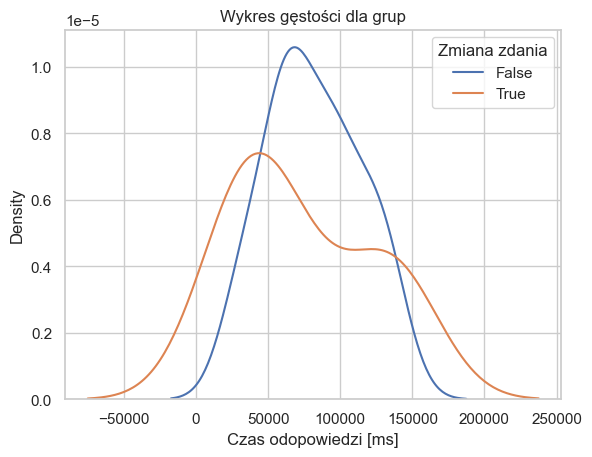

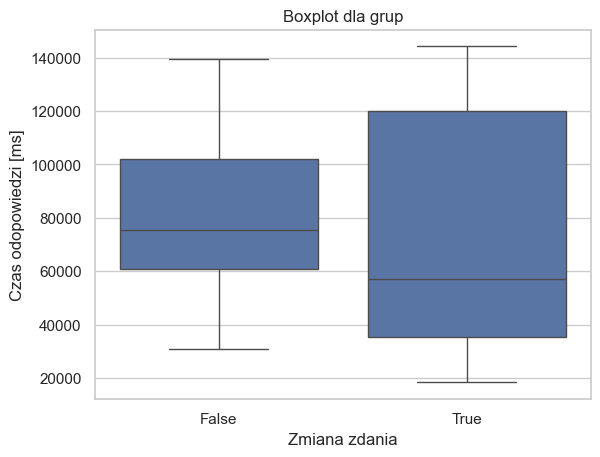

----------------
quest2
Conducting normality test...
Conducting homogeneity variance test...
T-Student test conducted...
T-statistic: 0.3346479055733697
p-value: 0.7397308865606165
Brak podstaw do odrzucenia H0.


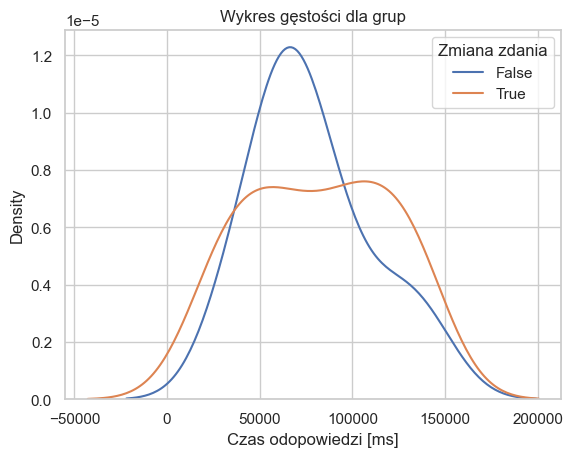

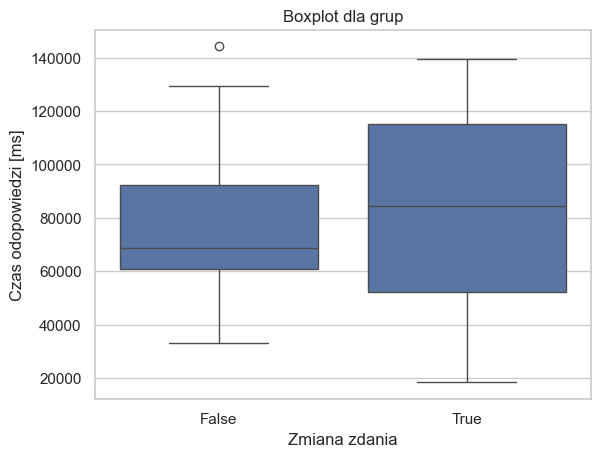

In [12]:
# dla każdej grafiki oddzielnie
col = 'time'
c = 'Duration'
label_col = 'Czas odopowiedzi [ms]'
label_quest = 'Zmiana zdania'

print('1a:')
df = prepare_set_changes_questions([df_merge[f'{c}_1a']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)
    
    
print('--------------------------------------------')
print('1b:')
df = prepare_set_changes_questions([df_merge[f'{c}_1b']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

print('--------------------------------------------')
print('2a:')
df = prepare_set_changes_questions([df_merge[f'{c}_2a']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

print('--------------------------------------------')
print('2b:')
df = prepare_set_changes_questions([df_merge[f'{c}_2b']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

print('--------------------------------------------')
print('3a:')
df = prepare_set_changes_questions([df_merge[f'{c}_3a']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

print('--------------------------------------------')
print('3b:')
df = prepare_set_changes_questions([df_merge[f'{c}_3b']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    ttest_or_mannwhitney_test(df, col, i, ALPHA, True, False)
    plot_multi_density(df, col, i, label_col, label_quest)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

Podsumowanie:
Zmiana zdania nie wpłynęła na czas odpowiedzi w sposób istotny statystycznie.

## Wizualizacje dla kolekcji

----------------
quest1_before


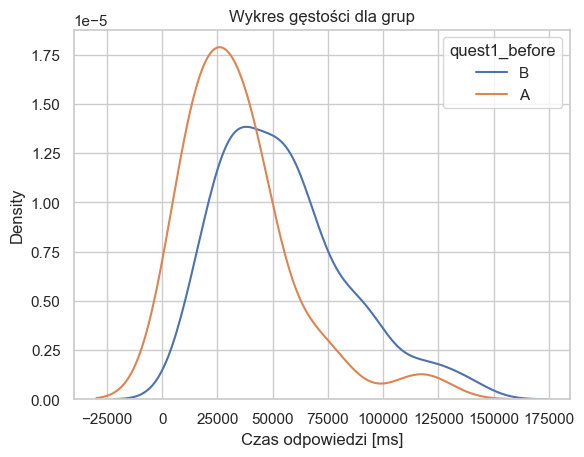

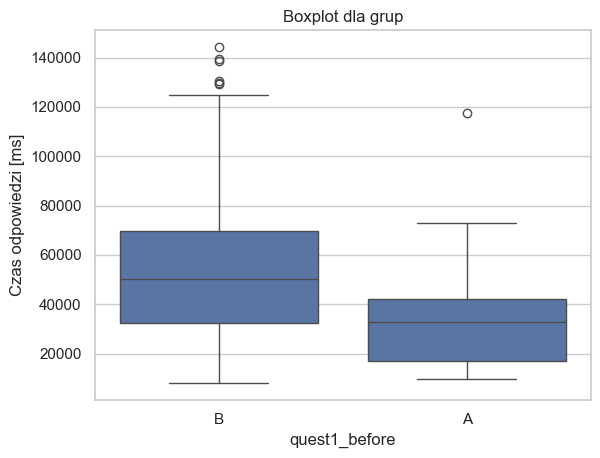

----------------
quest1_after


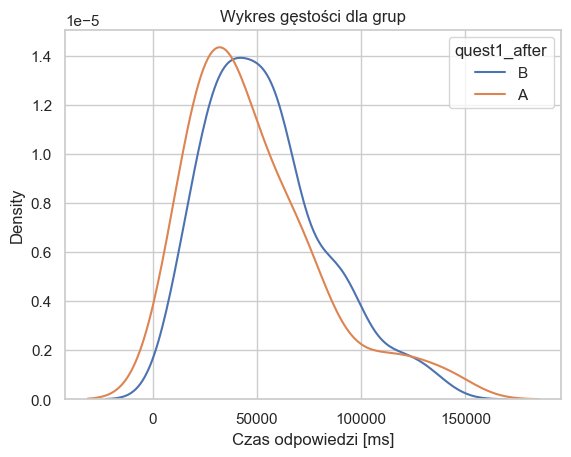

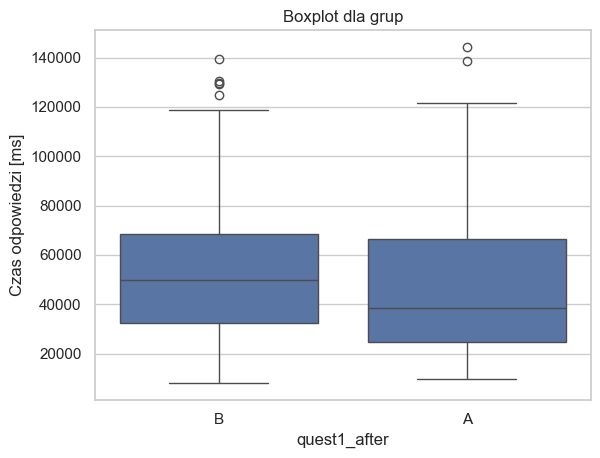

----------------
quest2_before


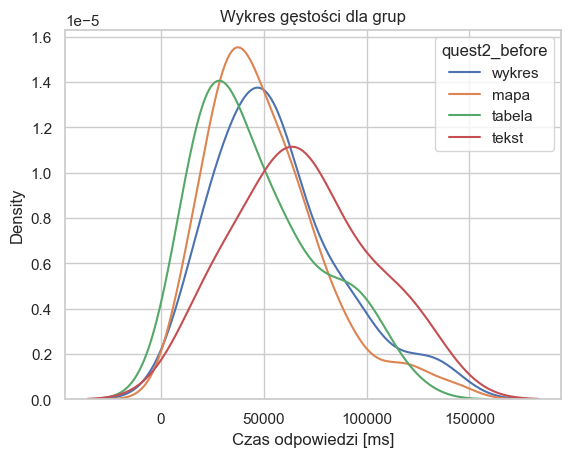

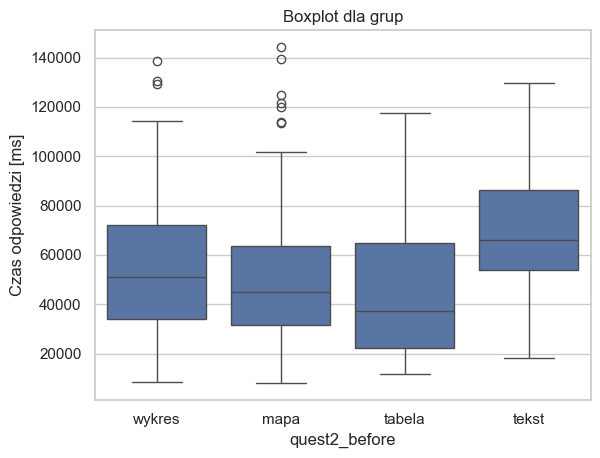

----------------
quest2_after


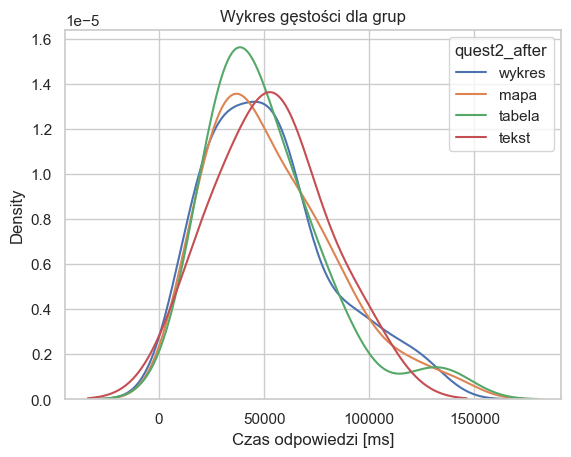

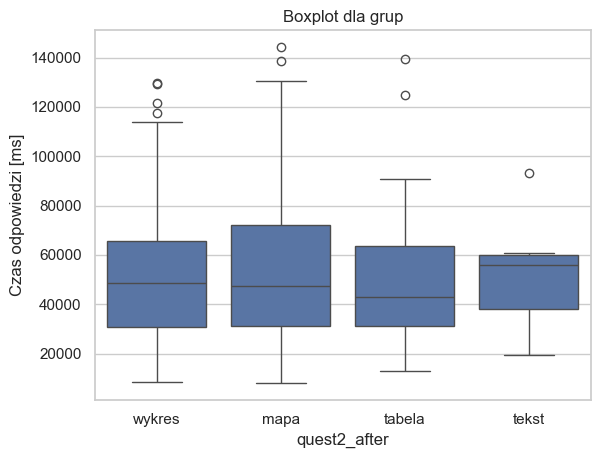

In [14]:
df = df_collAll.copy()
label_col = 'Czas odpowiedzi [ms]'
col = 'time'
for i in ['quest1_before', 'quest1_after', 'quest2_before', 'quest2_after']:
    print('----------------')
    print(i)
    plot_multi_density(df, col, i, label_col, i)
    plot_multi_boxplot(df, i, col, i, label_col)

----------------
quest1_before


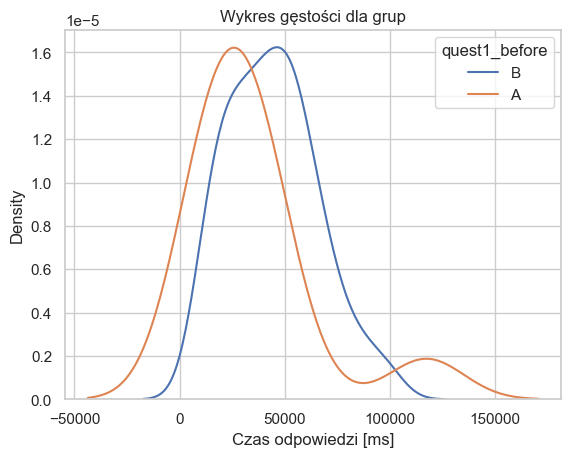

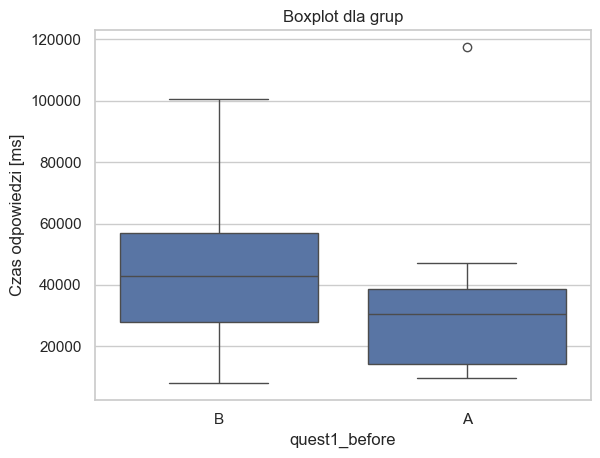

----------------
quest1_after


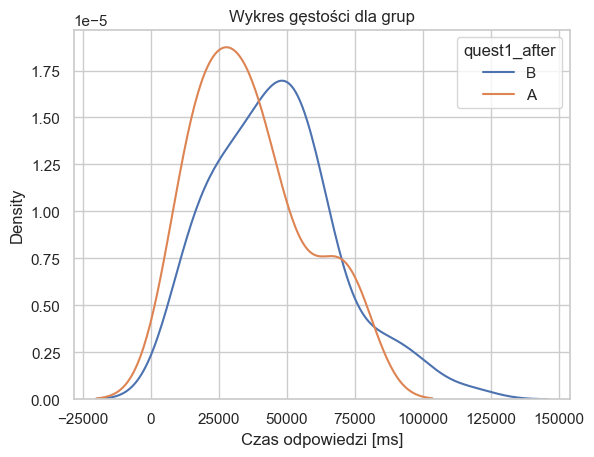

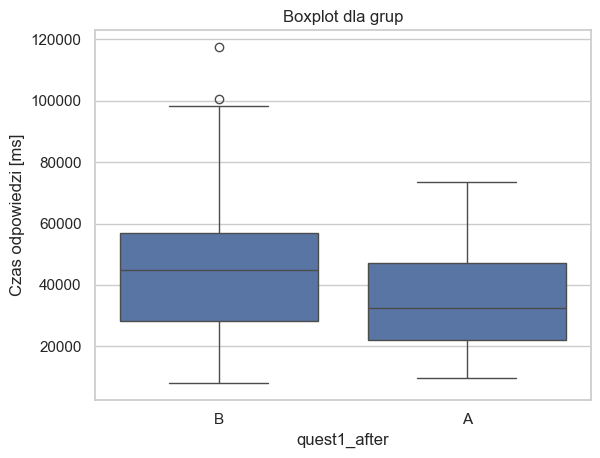

----------------
quest2_before


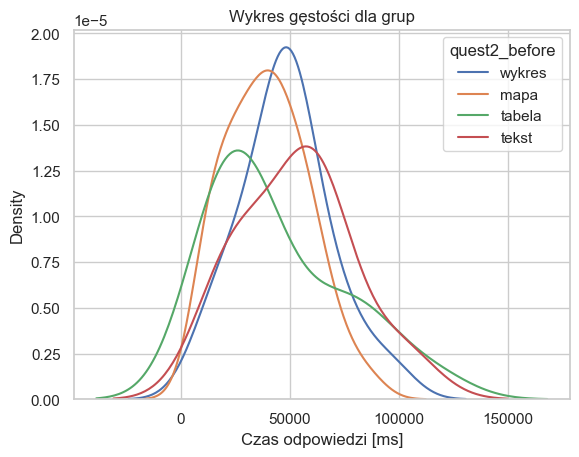

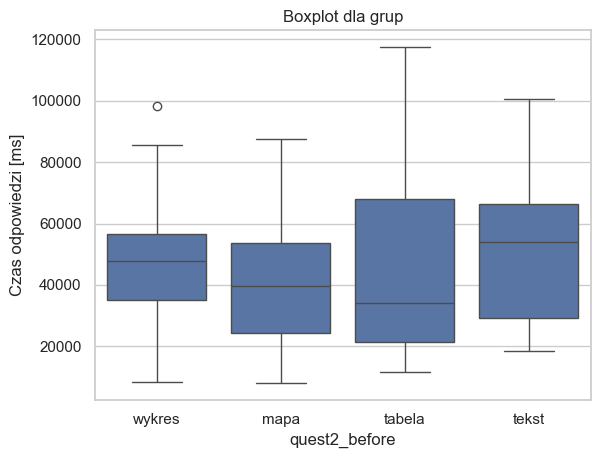

----------------
quest2_after


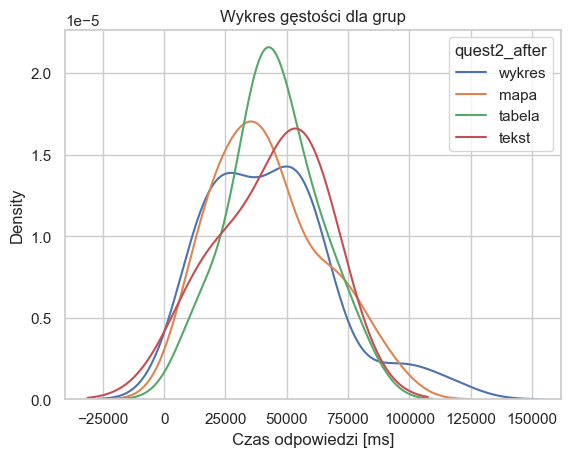

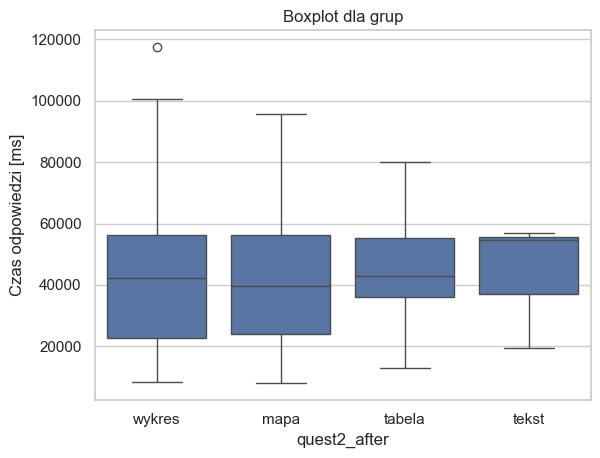

In [15]:
df = df_collA.copy()
label_col = 'Czas odpowiedzi [ms]'
col = 'time'
for i in ['quest1_before', 'quest1_after', 'quest2_before', 'quest2_after']:
    print('----------------')
    print(i)
    plot_multi_density(df, col, i, label_col, i)
    plot_multi_boxplot(df, i, col, i, label_col)

----------------
quest1_before


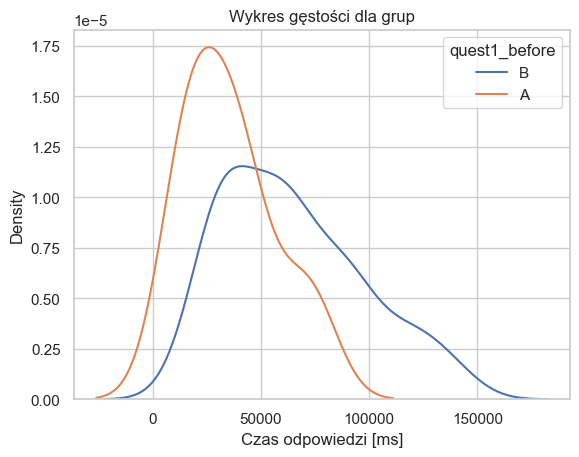

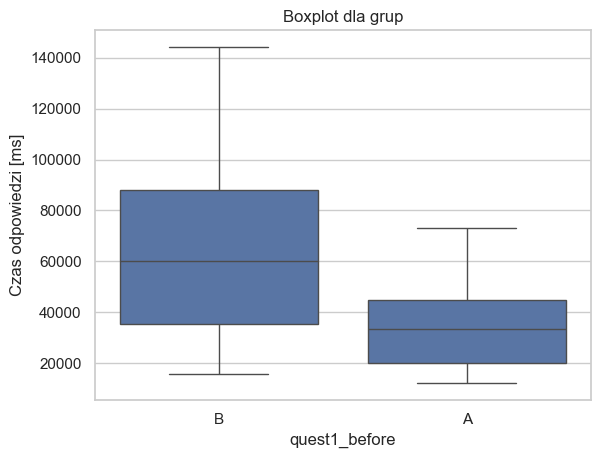

----------------
quest1_after


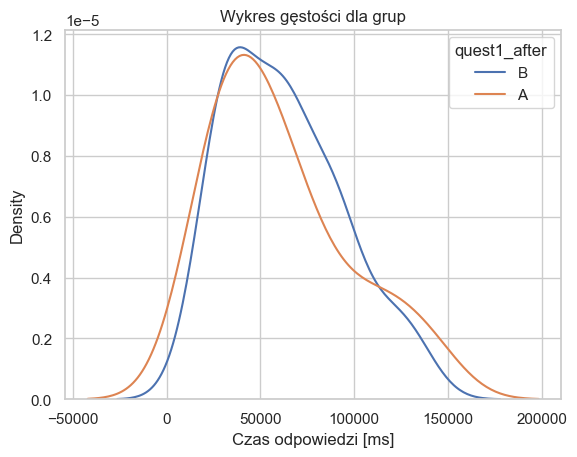

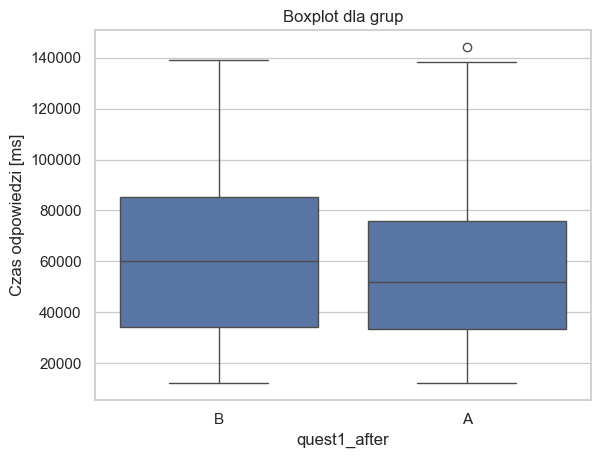

----------------
quest2_before


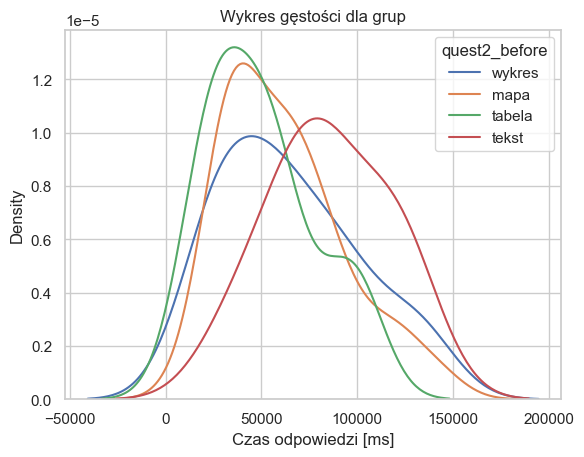

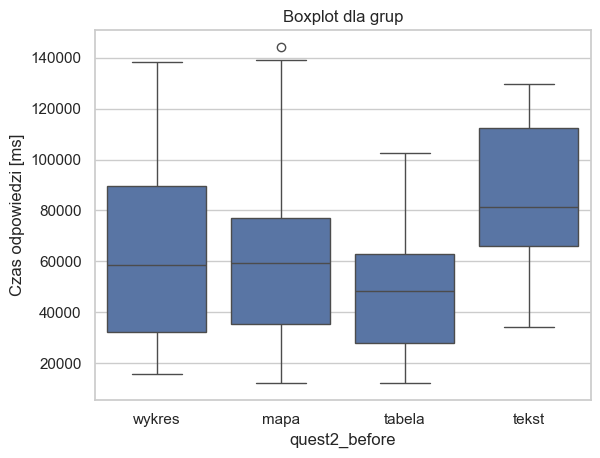

----------------
quest2_after


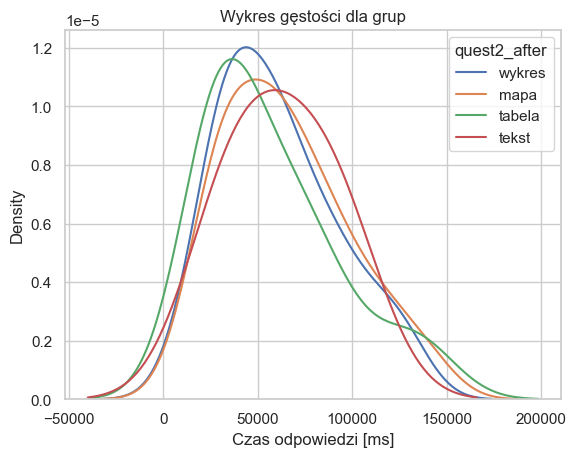

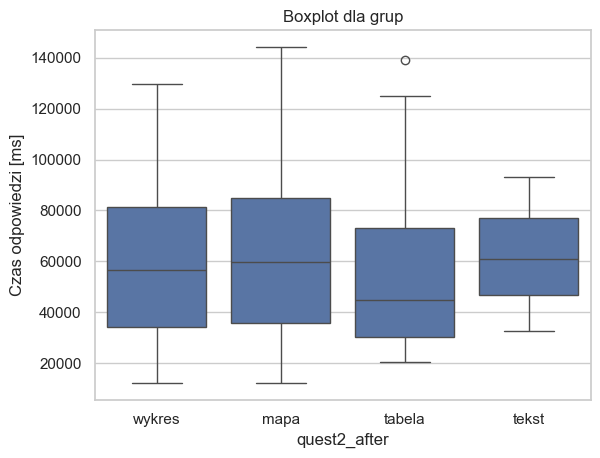

In [16]:
df = df_collB.copy()
label_col = 'Czas odpowiedzi [ms]'
col = 'time'
for i in ['quest1_before', 'quest1_after', 'quest2_before', 'quest2_after']:
    print('----------------')
    print(i)
    plot_multi_density(df, col, i, label_col, i)
    plot_multi_boxplot(df, i, col, i, label_col)

----------------
quest1_before


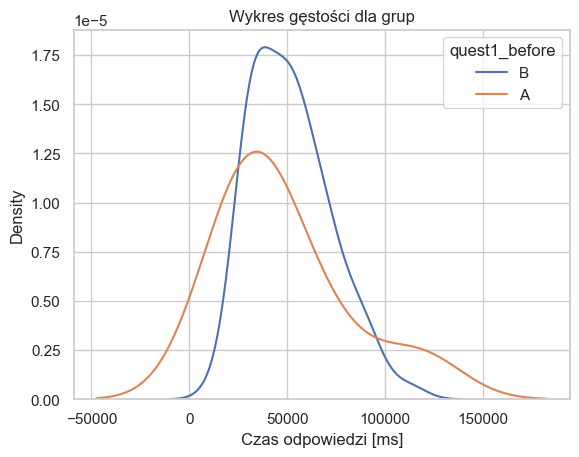

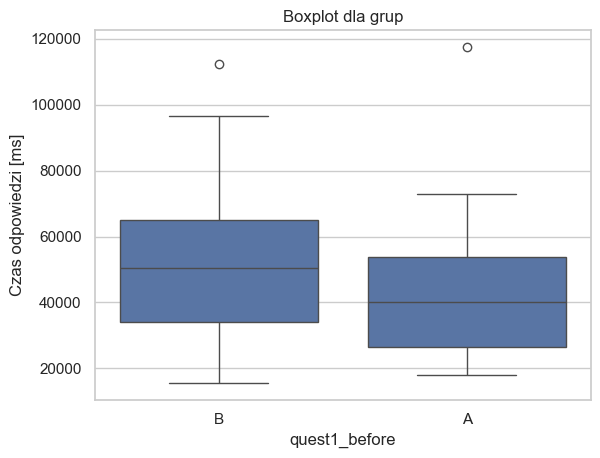

----------------
quest1_after


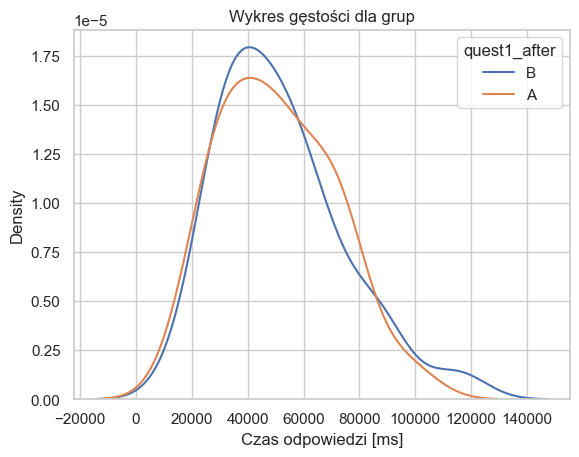

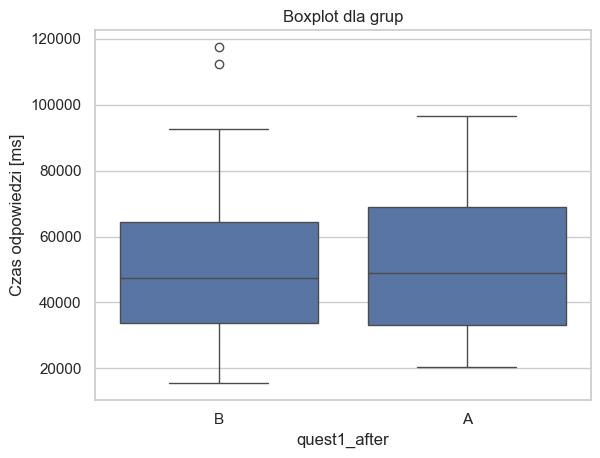

----------------
quest2_before


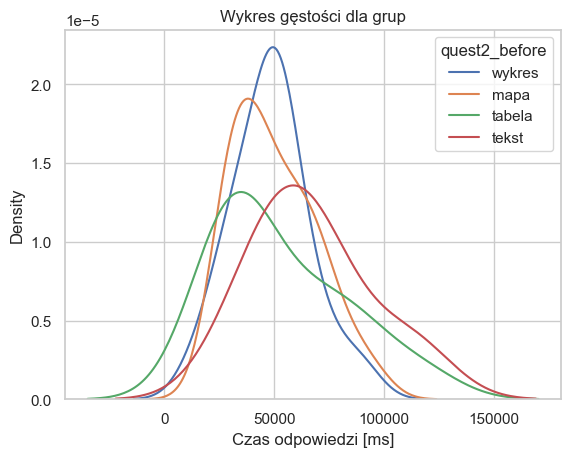

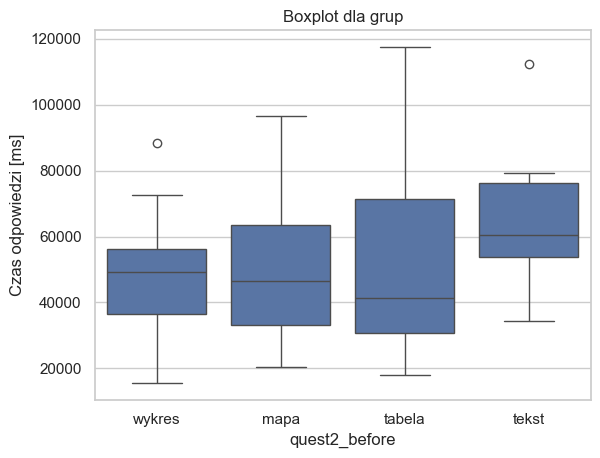

----------------
quest2_after


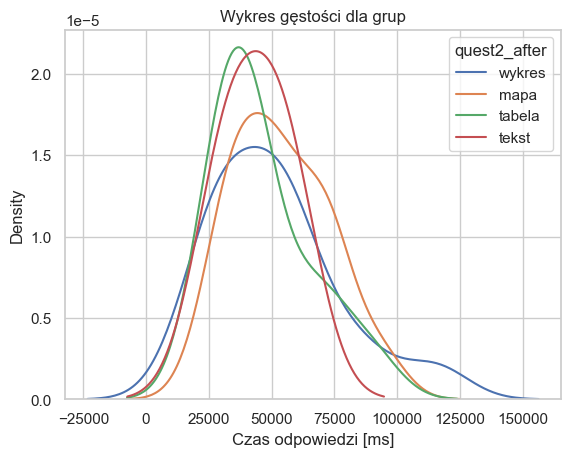

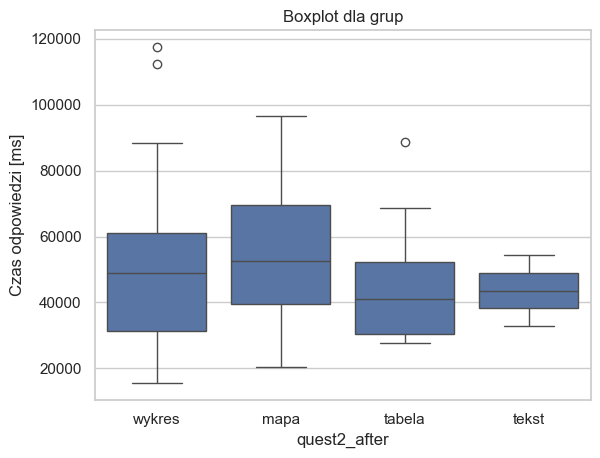

In [17]:
df = df_coll1.copy()
label_col = 'Czas odpowiedzi [ms]'
col = 'time'
for i in ['quest1_before', 'quest1_after', 'quest2_before', 'quest2_after']:
    print('----------------')
    print(i)
    plot_multi_density(df, col, i, label_col, i)
    plot_multi_boxplot(df, i, col, i, label_col)

----------------
quest1_before


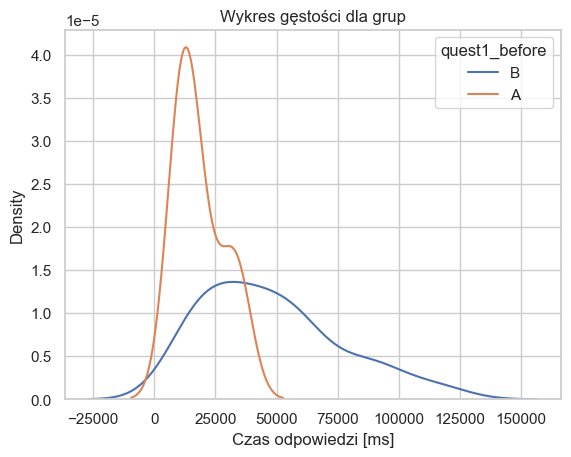

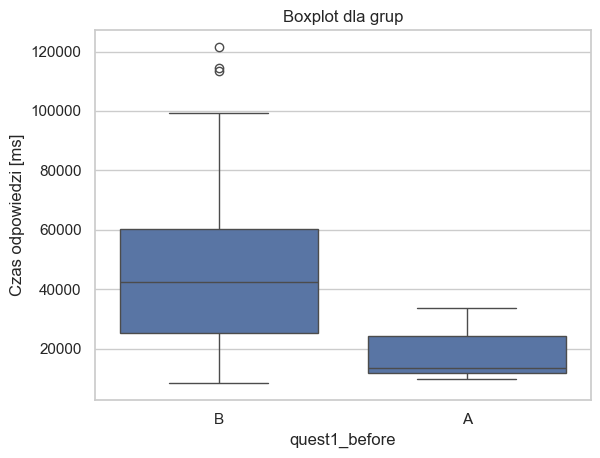

----------------
quest1_after


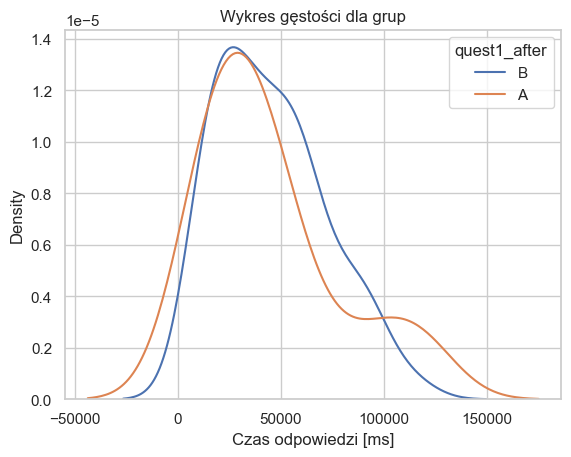

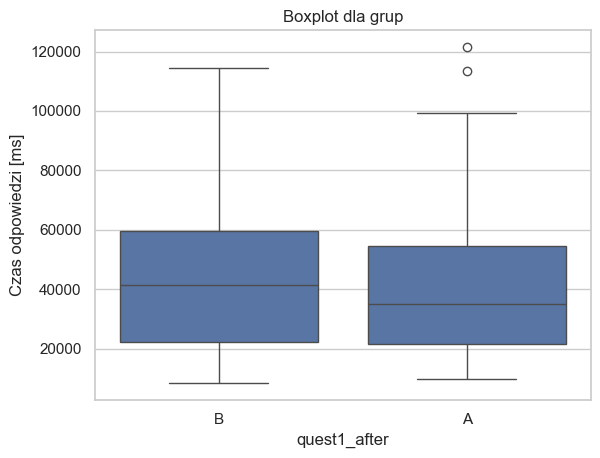

----------------
quest2_before


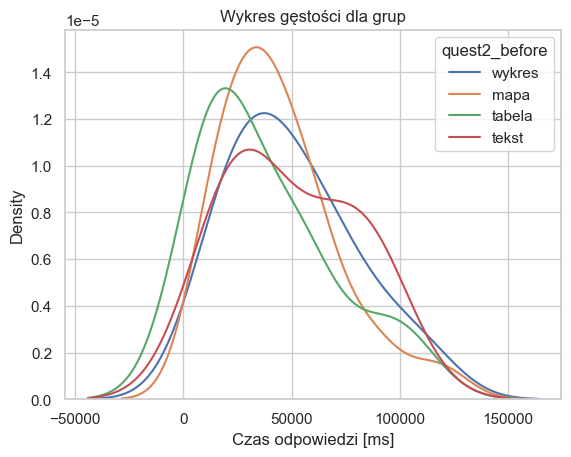

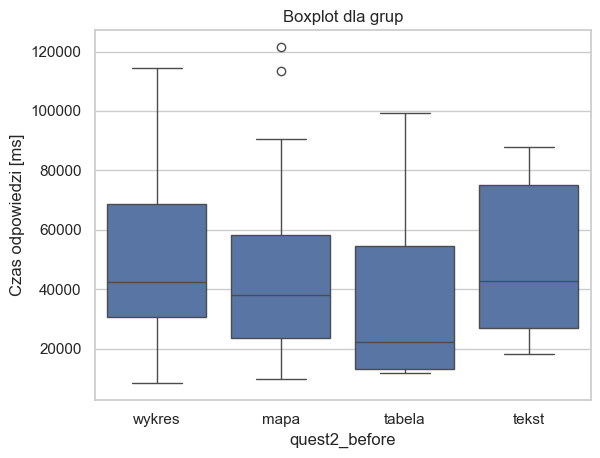

----------------
quest2_after


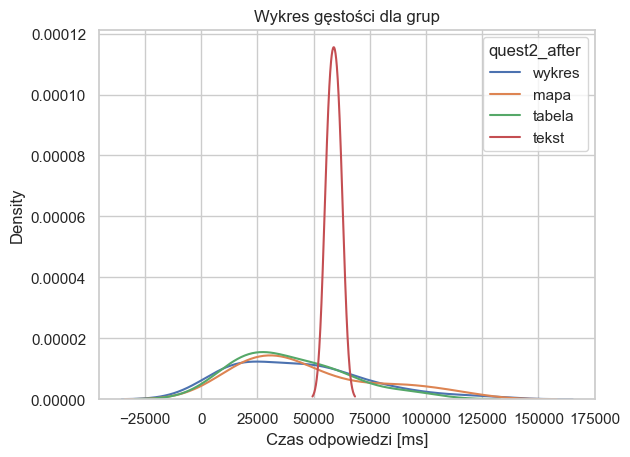

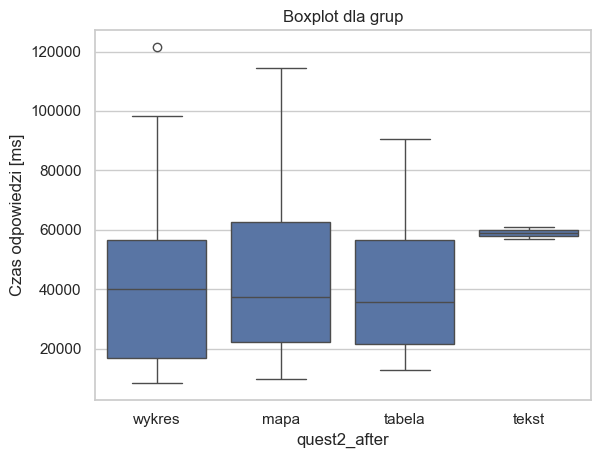

In [18]:
df = df_coll2.copy()
label_col = 'Czas odpowiedzi [ms]'
col = 'time'
for i in ['quest1_before', 'quest1_after', 'quest2_before', 'quest2_after']:
    print('----------------')
    print(i)
    plot_multi_density(df, col, i, label_col, i)
    plot_multi_boxplot(df, i, col, i, label_col)

----------------
quest1_before


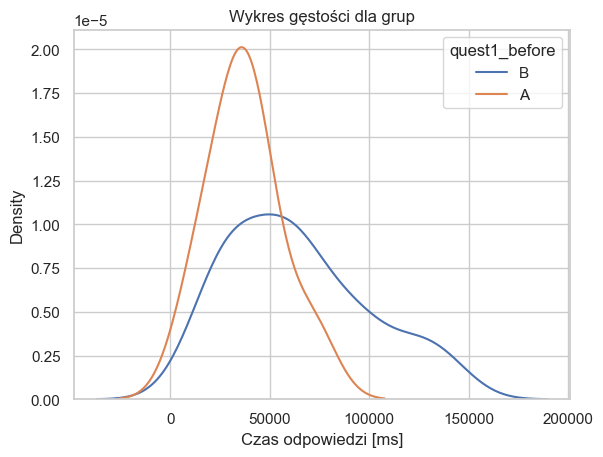

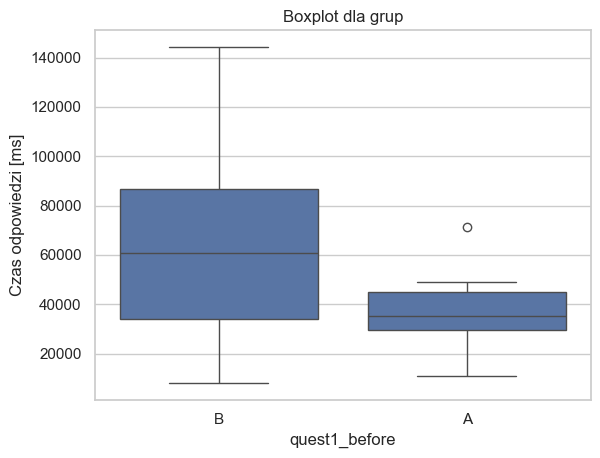

----------------
quest1_after


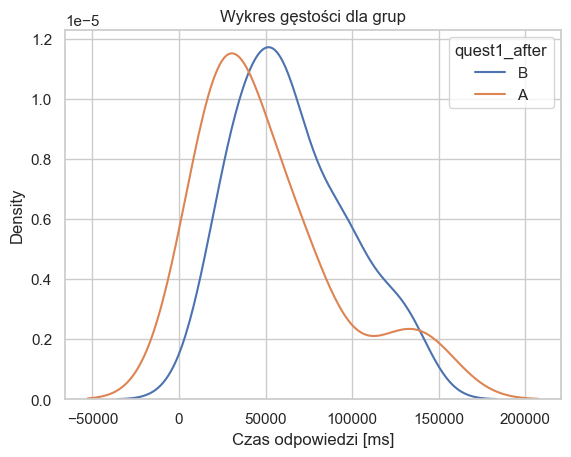

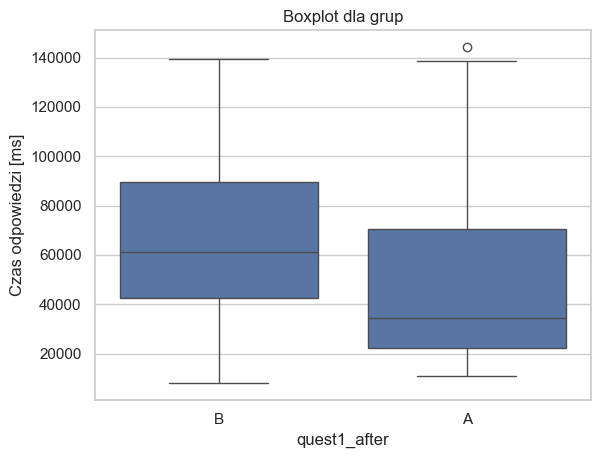

----------------
quest2_before


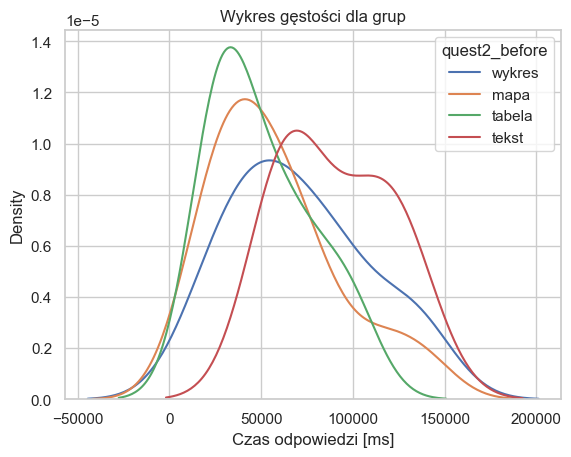

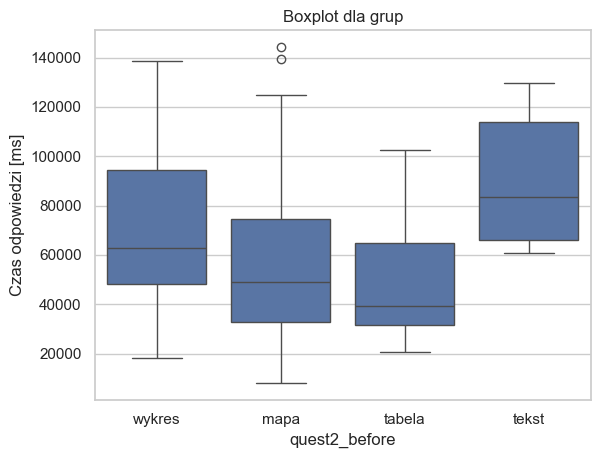

----------------
quest2_after


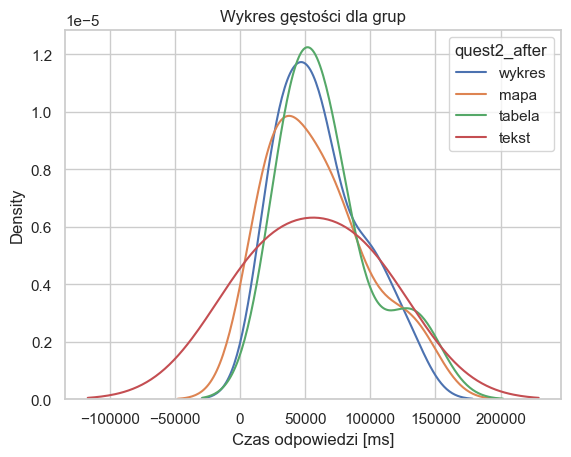

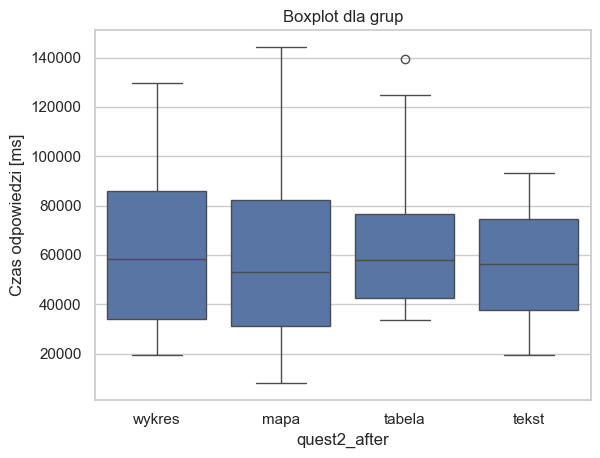

In [19]:
df = df_coll3.copy()
label_col = 'Czas odpowiedzi [ms]'
col = 'time'
for i in ['quest1_before', 'quest1_after', 'quest2_before', 'quest2_after']:
    print('----------------')
    print(i)
    plot_multi_density(df, col, i, label_col, i)
    plot_multi_boxplot(df, i, col, i, label_col)